In [1]:
from IPython.display import Image

# Convolutional Neural Networks - Introduction

Convolutional Neural Networks, in literature mostly refered to as Convolutional Networks or CNNs, represent a family of neural networks with a specific archutectural constraint. This constraint makes an assumption that the signal which is passed as an input to the network has grid-like topology. Some examples are:
- **Time Series:** type of data which represents a sequence of values in previously defined time interval. This kind of data can be viewed as 1-D grid
- **Digital Images:** real images are essentially artifacts which are used for visual representation of real world. In other words, they represent a way to interpret our surrounding by using the light from visual spectrum which is emited by the object we are observing in the given environment. Digital images however, represent 2-D numerical interpretation of the real images, and they are mostly constructed from the set of digital values known as image elements or pixels. Pixels are usually stored in computer memory as 2-D array of integer values in some pre-defined interval.

Name Convolutional Neural Networks suggests that, in at least one of the hidden layers of the network architecture, the output signal is not computed as the matrix multiplication of the input and its weights, but by using the mathematical operation known as convolution.

## Motivation - Why would we consider using Convolution instead of basic matrix multiplication?

Convolution introduces three really important concepts which make Machine Learning system more efficient. According to Goodfellow et.al. (in their DeepLearning book) these concepts are:
1. **Sparse Interactions**
2. **Shared Parameters**
3. **Equivariant Representation**

#### Sparse Interactions

In traditional neural network architectures what we would basically do is, we would transform input signal (in our case 2-D array (image)) into 1-D vector, which we would then multiply with a weight matrix **W** that represents strenght of the synapses between the **Input Layer** and the first **Hidden Layer**. Afterwards we would perform a non-linear transformation in order to increase the space of possible Hypothesis which our model can learn, and repeat the same process untill we reach the end of the network.

Every row in this weight matrix **W** describes the interaction between each of the input units (artificial neuron in the preceding layer), with each and every output unit (set of artifical neurons in the succeding layer). In other words, every artifical neuron in the input layer is fully connected with each and every artifical neuron in the succeding layer. This kind of architecture is illustrated in the picture below.

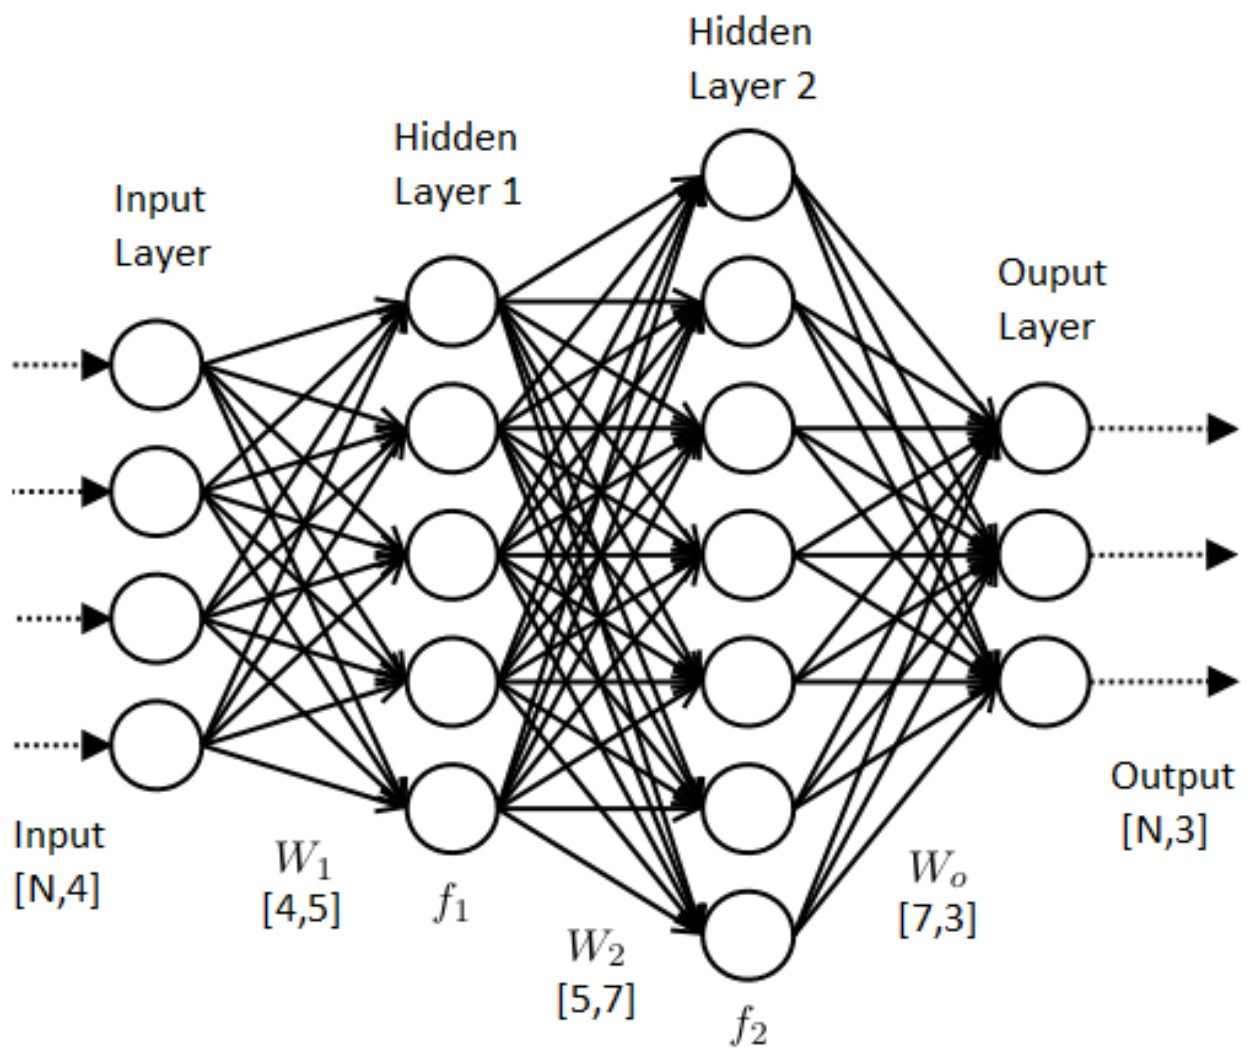

In [2]:
Image(filename = "tutorial_images/cnn/MLP.png")

In contrast to traditional neural network architecutres, Convolutional Neural Networks provide sparse interactions between a input and output layer, by constraining units of the output volume to be connected only to the local region of the input volume, which spatial dimensions are defined by the size of the receptipve field. 

Picture bellow shows a comparison between two neural network architectures. 
- Upper part of the image shows the way an output unit is calculated in traditional neural network architecture such as Multi Layer Perceptron,
- Bottom part of the image shows the way an output unit is calculated in Convolutional Neural Network architecture

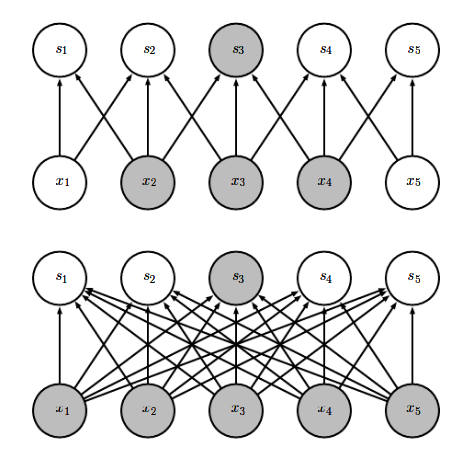

In [3]:
Image(filename = "tutorial_images/cnn/sparse interactions.png")

Note that in traditional neural network architecture, each of the input units: *x1,x2,x3,x4,* and *x5*, are used in order to calculate output unit *s3*. While in the Convolutional Neural Network architecture, only three of the input units, *x2, x3,* and *x4* to be more precise, are used in order to calculate the value of the output unit *s3*. This essentially means that the size of the local region/receptive field to which output unit *s3* is connected is equal to 3.

#### Parameter Sharing

In traditional neural network architectures, since each artifical neuron in the input layer is fully connected with each and every artificial neuron in the output layer, while none of the artifical neurons in the input layer share their connections, it is easy to conclude that each of the elements in weight matrix **W** will be used once and only once.

In Convolutional Neural Network architectures, a weight matrix, sometimes refered to as convolutional matrix or a mask, will convolve/slide across the spatial dimensions of the input volume, which essentially means that each of the weights (parameters of the convolutional matrix) is going to be used not once, but on each and every location of the spatial dimensions of the input volume (this doesnt have to be true, it all depends on the network design which we will talk latter on) in order to calculate corresponding output units. 

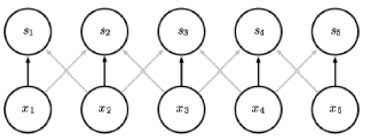

In [4]:
Image(filename = "tutorial_images/cnn/cnn.jpg")

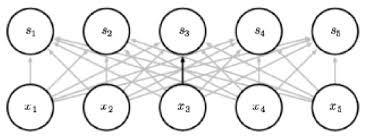

In [5]:
Image(filename = "tutorial_images/cnn/ann.jpg")

Bolded arrows on the image indicate a concrete value of the specific parameter. 
- Upper part of the image (Convolutional Neural Network) shows that a particular weight/parameter is used not once, but multiple times across the entire spatial dimension of the input volume. This means that each of the weights/parameters of the convolutional matrix contribute in calculating each of the units in the output volume
- Bottom part of the image (Traditional Neural Netwokr) shows that a particular weight/parameter is used once and only once in order to calculate specific output unit.

One should note that as a consequenec of its mathematical properties, convolution makes each of the network layers equavarient to translation. This essentially means that, if we would to translate an object/feature which we trained our convolution matrix to detect by some amount of pixels, its representation in the output of the convolutional layer would also be translated by the same amount of pixels as it was translated in the input. More on equavariance coming soon.

#### Equivariant Representation

Equivariance represents a usefull mathematical property which allows transformationg ***g*** over the input signal of the function ***f*** produce predictable, easly interperted transformation ***h*** over the output signal of the same function ***f***.

Formally, we say that a function which maps from input space to feature space ***f: X->Y*** is equivariant to group of transformations ***G*** if and only if we are able to associate each and every transformation ***g*** (that belongs to the group ***G***) over the input ***x*** with the transformation ***h*** (that belongs to the group ***H***) - see equation presented in the picture below.

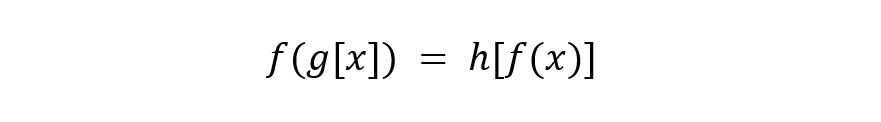

In [6]:
Image(filename='tutorial_images/cnn/equivariance.png')

This essentially means that the order in which we apply the transformation and perform the mapping from the input space to the feature space, does not matter! In other words, function ***f*** and transformation ***g*** commute.

**IMPORTANT NOTE:** generally, transformation ***g*** does not have to be the same as transformation ***h*** (***g!=h***).

In order to illustrate how equivariance works, I have created a simple yet descriptive image in **Paint**(and no, I am not proud of the fact that the Paint is only program I know how to use for this purpose).

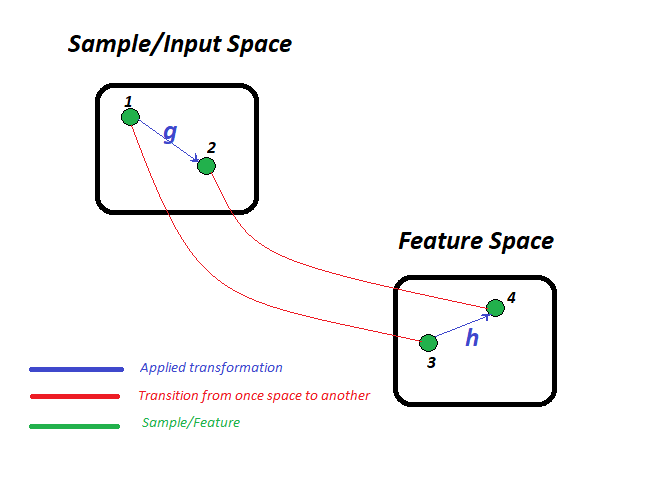

In [7]:
Image(filename='tutorial_images/cnn/equivariant representation.png')

Property of equivariance states that if we were to apply some transformation ***g*** over some sample in the input/sample space (transition from **1 - 2**) and pass the result as an argument to function ***f*** (transition from **2 - 4**), that would be the same as first passing the input/sample to function ***f***(transition from **1 - 3**) and then applying the transformation ***h*** (transition **3 - 4**). Notice that this time we are applying trasnforamtion in the feature space.

**IMPORTANT NOTE**: special case of equivariance is invariance. That is, when ***h = {identity}***. Invariance essentially means that feature vectors produced by the function ***f*** stay constant (unchanged) no matter which tranformation ***g*** has been applied over the input ***x***. Formally:

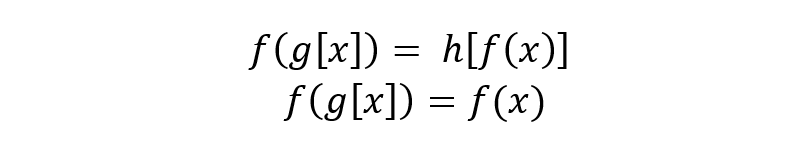

In [8]:
Image(filename = 'tutorial_images/cnn/invariance.png')

### Pooling

Typical layer, or should we say block, in convolutional neural netowrks can be summarized in three different stages:
- ***Stage 1(Convolution):*** in the first stage we are calculating the set of linear activations by performing convolution between input volume and K different filters. This set of linear activation is then passed to the next stage known as "Detector Stage".
- ***Stage 2(Detector Stage):*** in this stage we are introducing nonlinearity to the model. That is, we are deciding wihcih of the neurons are showing high enough activation potential and which are not. The resulting 2-D activation map is then passed over to next stage.
- ***Stage 3(Pooling):*** here we are using pre-defined pooling function in order to modify the input, which is essentially the output of the previous stage, for further processing.

Pooling function modifies the input signal by replacing the square set of neighborhood elements (this set is determined by the size of the pooling window - one of the many hyperparameters) with the short summary of some statistical information on the given location. Location is determined by the reference point of the pooling window which is usually the ccenter.

One of many examples of Pooling functions would be Max Pooling. Max Pooling is an operation which generates a  summary of maximal value in the observed neighborhood, where the size of the neighborhood is determined by the size of the pooling window.

***IMPORTANT NOTE:*** any kind of pooling function helps us make the output representation of the input volume PARTIALLY invariant to small translations over the input.

Invariance to translation means that if the value of the input signal is to be translated in space, its output represnetation would stay unchanged. Like the transformation never even happened. But, in convolutional neural networks we can achive only partial invariance, not total.

You mighit ask yourself, where is this property shown to be useful? Invariance to translation is shown to be useful when we care more about wether the object is present in the picture then its exact location on it. 

In summary, pooling function throws away all spatial information of the features which we are trying to detect. This is illustrated on the picture bellow.

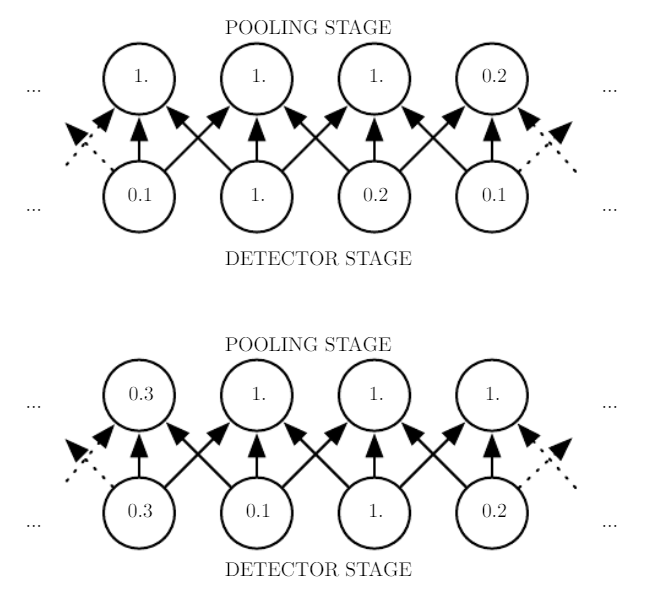

In [9]:
Image(filename = "tutorial_images/cnn/pooling_function.png")

One should note that pooling only introduces partial invariance over the translation transformation, but there is a way in which we could learn to be partially invariant to other transformations beside translation, such as rotation or scaling. 

If we were to parametrize filters in the basic convolutional layer such that each of the filters is able to detect the same object but with different orientation, in that case the function that performs pooling would be able to learn the given convolutional layer how to become partially invariant to rotation. See image bellow.

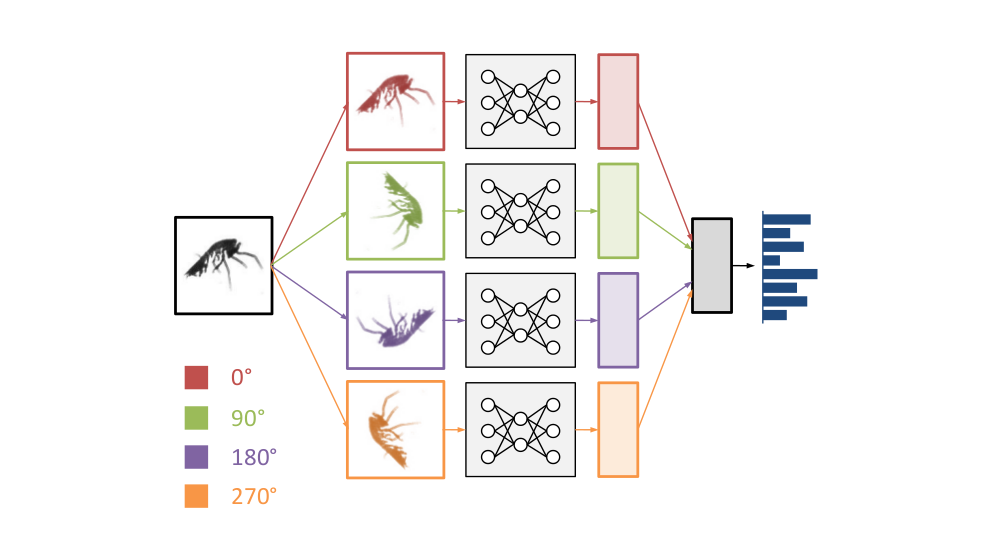

In [10]:
Image(filename = "tutorial_images/cnn/pooling.png")

## Implementation Notes

Organization and total amount of artifical neurons inside the output volume of the convolutional layer is controller by three hyperparameters:
1. ***Depth*** of the output volume. This hyperparameter corresponds to the total amount of filter which are used in the give convolutional lazer. Each of these filters is used to detect distinct patterns from the input volume.
2. ***Stride*** which filters use to convolve across the spatial dimensions of the input volume. If the stride is equal to one (s = 1), filter will convolve/slide at every possible spatial location of the given input volume. If the stride is greater then one (s > 1), with each step, filter will skip s-1 location in the given input volume. In other words, convolution operation is performed on every s locations across spatial dimensions of the given input volume.
3. ***Zero-Padding***. With the help of this hyperparameter we are able to control the spatial dimensions of the output volume. Spatial dimensions of the output volume can be calculated via a function which depends on the spatial size of the input volume (W), size of the receptive field (F), stride (S) and the amount of zero-padding thats being used (P). Formally: ***(W + F + 2*P)/S + 1**

***IMPORTANT NOTE***: Please be aware of the subtle difference in terms ***"kernel"*** and ***"filter"***. When we are working with the data which are organized as 2-D grid of values (***H x W x D***, where ***D = 1***), term ***"filter"*** is equivalent to thee term ***"kernel"***. In the general case, these two terms represent two different things. Every filter consists of collection of kernels, where every kernel corresponds to exactly one channel of the input volume at the given layer. Also, every filter in the given convolutional layer produces one and only one channel. 

This point can be illustrated on the picture seen below, where we see one filter with 3 kernels (one for each of the RGB channels) that convolves over the input image and produces only one kernel as a result.

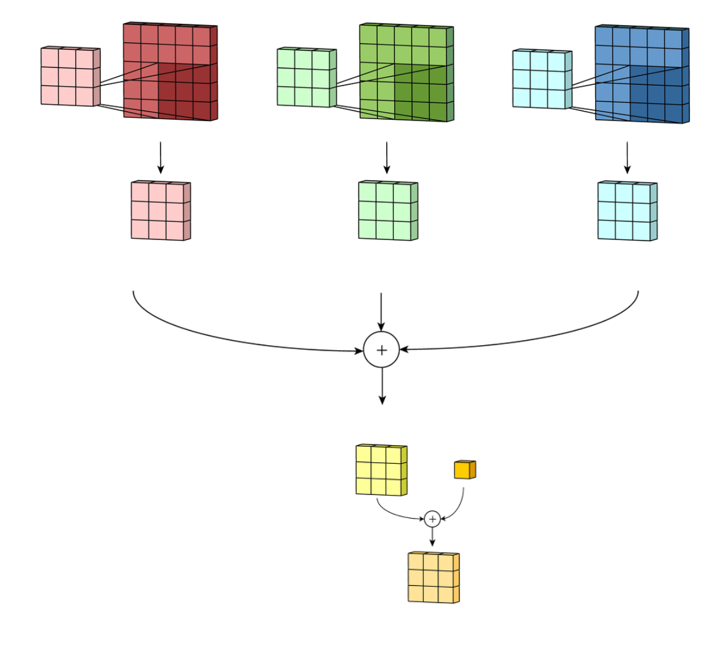

In [11]:
Image(filename = 'tutorial_images/cnn/filter_kernel.png')

## TensorFlow Programming Library - Brief Overview

Now that we have covered the basics, lets implement the damn thing! For the implementation we will be using Google's TensorFlow Library, a framework intended for defining and executing mathematical computations in which tensor object represent a central data type.

There are two different ways in which you could write programs in TensorFlow, each of them has their own advantages:
1. ***Define and Run:*** TensorFlow uses dataflow graph programming model often used for parallel computing. In this kind of programming model there are two different entities:
    - ***Node*** - which represents mathematical operation (instance of tf.Operation class)
    - ***Edge*** - which represents data, a concrete value (instance of tf.Tensor class) which is being consumed and/or produced by the graph nodes.
  Up untill TensorFlow version 2.0, this was the default way to write TensorFlow programs. Each program can be roughly derived in two parts:
    - Building computational graph (instance of tf.Graph class)
    - Execution previously build computational graph inside a specific session (instance of tf.Session class)
    
2. ***Eager execution:*** represents an imperative programming environment in which operations are being immediately evaluated instead of being first defined in order to construct computational graph and executed afterwards. In other words, instead of specifying set of operations in order to construct our computational graph, in eager execution programming environment operations return conrete values - tensors. Why would we consider using eager execution you might ask. Well, there are various types of reasons, such as:
   - Intuitive interface which allows us to structure our code in a more natural (pythonic if you will) way.
   - Easier code debugging. By immediatelly executing tf.Operation objects we are able to debug our model, not only after it has been constructed, but also along the way.
   - Natural control flow of the program
   
In the remaining part of this tutorial we will be using TensorFlows eager execution programming environment because of the reasons provided above. Also, it is worth to mention that from TensorFlow's 2.0 version, eager execution is going to be default way of writting TensorFlow programs.

## Implementing Convolutional Naural Network in TensorFlow and Training it on MNIST Dataset

First of all we have to define necessary imports and enable eager execution programming environment.

In [12]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 
import numpy as np
import copy
import time

import keras

from keras import backend as K
from keras.models import Model
from keras.utils import plot_model

#By executing the following command we are essentially entering eager execution programming environment.
tf.enable_eager_execution()

print("Tensorflow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

Tensorflow version: 1.12.0
Eager execution: True


Using TensorFlow backend.


Roughly speaking, there are four ingredients to the recipe of training deep neural network models, and those are:
1. *Dataset*
2. *Loss function*
3. *Neural Network Architecture*
4. *Optimization method*


We start by gathering and preparing dataset for our model to consume. Now, typical TensorFlow pipeline for gathering and processing data can be described as an Extract Transform and Load, or in short, ETL process:
1. ***Extract:*** read data from some sort of persistent storage, it could be local such as HDD or SDD, or it could be remote such as GCS or HDFS
2. ***Transform:*** by utilizing available CPU cores, parse input data, and execute preprocessing operations such as data augmentation, shuflling, batching, and so on.
3. ***Load:*** load previously transformed data in one (or more) available accelerator devices, such as GPU or TPU.

The pattern described above effectivly utilizes CPU cores for preprocessing the data, while utilizing GPU(s)/TPU(s) for harder tasks such as training the model. Also, it is worth mentioning that this kind of pattern can easily be optimized. But that is out of the scope of this tutorial.


We start with extracting necessary data (E part of the ETL)  from local or remote storage on which we will *train/test/validate* our model.

In [13]:
#tf.keras.dataset.mmnist.load_data function will automatically download MNIST dataset for us if it is not already on our file system.
#Not only that, it will devide it into *training set*, and *testing set*.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path = "mnist.npz")

In [14]:
print('Training Data Shape: {}'.format(x_train.shape))
print('Target Label Shape: {}'.format(y_train.shape))

Training Data Shape: (60000, 28, 28)
Target Label Shape: (60000,)


Now that we have extracted necessary data, lets perform necessary transfomrations in order to make training procedure more efficient (*T part of the ETL process*).

In [15]:
def generate_dataset(x_train, y_train):
    """
    Arguments:
        x_traing: training dataset,
        y_train: labels
    Returns:
        dataset: tf.data.Dataset object which elements are represented
                as a tuple (data, label)
    """
    dataset = tf.data.Dataset.from_tensor_slices(
             (tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
              tf.cast(y_train, tf.int64)))
    return dataset.shuffle(1000).batch(32)

In [16]:
dataset = generate_dataset(x_train, y_train)

We have gathered our dataset, prepared it for our model to consume it, now we have to actually define our models architecture.

For defining our CNN architecture we will use TensorFlows tf.keras programming module. There are 3 different ways in which we could use tf.keras module in order to define a model architecture:
1. ***Define model as a Sequence of Layers*** - creating tf.keras.Sequential object which allows us to specify sequence of layers from which we want to construct our network architecture.
2. ***Combining the use of functional API with the instance of tf.keras.Model class.*** This allows us to build more complex models, such as models with mutiple inputs/single ouput, models which can share layers and so on. **Note:** this is not possible with the use of tf.keras.Sequential class.
3. ***Model subclassing*** - this way we can create our own fully-customizzable models by subclassing the tf.keras.Model class by defining the network architecture in the class construcotr and implementing our own forward pass in the *call* method.

I decided to go with model subclassing since it allows us to build complex models with more flexibility then other two methods do. Also, model subclassing is the right way of defining your model when you are programming in eager execution environment.

In [17]:
class ConvNet(tf.keras.Model):
    
    def __init__(self, classes):
        """
        Class constructor
        
        Arguments:
            classes: number of classes on which our classifier will be trained on
        """
        super(ConvNet, self).__init__()
        
        self.conv_layer1 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,strides = (1,1),
                                                  padding = "same",activation = "relu")
        self.pool_layer1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))
        self.conv_layer2 = tf.keras.layers.Conv2D(filters = 64, kernel_size = 3,strides = (1,1),
                                                  padding = "same",activation = "relu")
        self.pool_layer2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))
        self.conv_layer3 = tf.keras.layers.Conv2D(filters = 128, kernel_size = 5,strides = (1,1),
                                                  padding = "same",activation = "relu")
        self.pool_layer3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (1,1),
                                                       padding = "same")
        self.flatten = tf.keras.layers.Flatten()
        self.dense_layer1 = tf.keras.layers.Dense(units = 512, activation = "relu")
        self.dense_layer2 = tf.keras.layers.Dense(units = classes, activation = "softmax")
        
    def call(self, inputs, training = True):
        """
        Method which defines the Forward Pass of our CNN model
        
        Arguments:
            inputs: preprocessed input data
            training: boolean value which allows us to specify if the variables
                    (essentially we mean parameters) used to define the network
                    architecture are trainable or not.
        Returns:
            tf.Tensor object: output tensor of the last layer inside the networks
                            architecture.
        """
        output_tensor = self.conv_layer1(inputs)
        output_tensor = self.pool_layer1(output_tensor)
        output_tensor = self.conv_layer2(output_tensor)
        output_tensor = self.pool_layer2(output_tensor)
        output_tensor = self.conv_layer3(output_tensor)
        output_tensor = self.pool_layer3(output_tensor)
        output_tensor = self.flatten(output_tensor)
        output_tensor = self.dense_layer1(output_tensor)
        
        return self.dense_layer2(output_tensor)
        
    def calculate_loss(self, labels, logits):
        """
        Method which defines a Loss Function which our model is suppose to optimize
        
        Arguments:
            labels: class labels
            logits: predicted values by our model
        Returns:
            tf.Tensor object: value which quantifies how bad of a job our model did
                            at classifiying the input data.
        """
        return tf.losses.sparse_softmax_cross_entropy(labels, logits)

In [18]:
model = ConvNet(data_format = "channels_last", classes = 10)

Alright! Everything is set, lets now define the training procedure for our model. Before we get into that, I would like to briefly talk about something called "Automatic Differentiation".

Automatic Differentiation represents a set of techniques intended for numericaly evaluating derivatives of a function whic is specified by a computer program (at least Wikipedia saids so). TensorFlow provides us with tf.GradientTape API which is intended for performing auotmatic differentiation, that is, numerically computing gradients of a specific computation with the respect to its input variables.

TensorFlow "records" every operation which has been executed inside the context of tf.GradientTape API on a "tape". TensorFlow then lets us use the "tape" and gradients which are associated with each and every recorded operation on that tape. By doing that, we are able to calculate gradients of the entire recorded computation by utilizing reverse differentiation mode.

I will talk more about tf.GradientTape API and eager execution in general in one of my next tutorials.

In [19]:
#Here we are defining the optimization method which will be used in order to update our gradients
#when backpropagating through the network.
optimizer = tf.train.AdamOptimizer()

loss_history = []
epochs = 5

for i in range(epochs):
            
    start_time = time.time()
            
    for (batch, (images, labels)) in enumerate(dataset):

        with tf.GradientTape() as tape:
            logits = model(images, training = True)
            loss_value = model.calculate_loss(labels, logits)

        loss_history.append(loss_value.numpy())
        #Calculate the gradients of the loss function with the respect to model parameteres
        grads = tape.gradient(loss_value, model.trainable_variables)
        #Apply those gradients in order to update model parameters and move closer to functions
        #(local) minima.
        optimizer.apply_gradients(zip(grads, model.trainable_variables),
                                         global_step = tf.train.get_or_create_global_step())

        print("[INFO]: Epoch #{} - Completed Batch #{} | Loss: {}".format(i, batch, loss_value))

    print("[INFO]: Time taken for Epoch #{} in sec: {}".format(i, time.time()-start_time))

[INFO]: Epoch #0 - Completed Batch #0 | Loss: 2.3039748668670654
[INFO]: Epoch #0 - Completed Batch #1 | Loss: 2.2895567417144775
[INFO]: Epoch #0 - Completed Batch #2 | Loss: 2.263552188873291
[INFO]: Epoch #0 - Completed Batch #3 | Loss: 2.271373987197876
[INFO]: Epoch #0 - Completed Batch #4 | Loss: 2.218681812286377
[INFO]: Epoch #0 - Completed Batch #5 | Loss: 2.3048200607299805
[INFO]: Epoch #0 - Completed Batch #6 | Loss: 2.1493444442749023
[INFO]: Epoch #0 - Completed Batch #7 | Loss: 2.198467254638672
[INFO]: Epoch #0 - Completed Batch #8 | Loss: 2.289994955062866
[INFO]: Epoch #0 - Completed Batch #9 | Loss: 2.1456122398376465
[INFO]: Epoch #0 - Completed Batch #10 | Loss: 2.130423069000244
[INFO]: Epoch #0 - Completed Batch #11 | Loss: 2.093045234680176
[INFO]: Epoch #0 - Completed Batch #12 | Loss: 1.980716586112976
[INFO]: Epoch #0 - Completed Batch #13 | Loss: 2.0092813968658447
[INFO]: Epoch #0 - Completed Batch #14 | Loss: 2.076404571533203
[INFO]: Epoch #0 - Completed 

[INFO]: Epoch #0 - Completed Batch #132 | Loss: 1.6723016500473022
[INFO]: Epoch #0 - Completed Batch #133 | Loss: 1.9121577739715576
[INFO]: Epoch #0 - Completed Batch #134 | Loss: 1.719893455505371
[INFO]: Epoch #0 - Completed Batch #135 | Loss: 1.7043148279190063
[INFO]: Epoch #0 - Completed Batch #136 | Loss: 1.7388129234313965
[INFO]: Epoch #0 - Completed Batch #137 | Loss: 1.772279977798462
[INFO]: Epoch #0 - Completed Batch #138 | Loss: 1.7387574911117554
[INFO]: Epoch #0 - Completed Batch #139 | Loss: 1.7474524974822998
[INFO]: Epoch #0 - Completed Batch #140 | Loss: 1.6440306901931763
[INFO]: Epoch #0 - Completed Batch #141 | Loss: 1.850577473640442
[INFO]: Epoch #0 - Completed Batch #142 | Loss: 1.5641717910766602
[INFO]: Epoch #0 - Completed Batch #143 | Loss: 1.7086246013641357
[INFO]: Epoch #0 - Completed Batch #144 | Loss: 1.6690213680267334
[INFO]: Epoch #0 - Completed Batch #145 | Loss: 1.785374641418457
[INFO]: Epoch #0 - Completed Batch #146 | Loss: 1.710428237915039


[INFO]: Epoch #0 - Completed Batch #254 | Loss: 1.6690175533294678
[INFO]: Epoch #0 - Completed Batch #255 | Loss: 1.7069098949432373
[INFO]: Epoch #0 - Completed Batch #256 | Loss: 1.5949959754943848
[INFO]: Epoch #0 - Completed Batch #257 | Loss: 1.6073111295700073
[INFO]: Epoch #0 - Completed Batch #258 | Loss: 1.5838019847869873
[INFO]: Epoch #0 - Completed Batch #259 | Loss: 1.5799564123153687
[INFO]: Epoch #0 - Completed Batch #260 | Loss: 1.7100096940994263
[INFO]: Epoch #0 - Completed Batch #261 | Loss: 1.5737580060958862
[INFO]: Epoch #0 - Completed Batch #262 | Loss: 1.7730073928833008
[INFO]: Epoch #0 - Completed Batch #263 | Loss: 1.6197242736816406
[INFO]: Epoch #0 - Completed Batch #264 | Loss: 1.6569139957427979
[INFO]: Epoch #0 - Completed Batch #265 | Loss: 1.7265968322753906
[INFO]: Epoch #0 - Completed Batch #266 | Loss: 1.615295171737671
[INFO]: Epoch #0 - Completed Batch #267 | Loss: 1.6219847202301025
[INFO]: Epoch #0 - Completed Batch #268 | Loss: 1.5944147109985

[INFO]: Epoch #0 - Completed Batch #378 | Loss: 1.581972599029541
[INFO]: Epoch #0 - Completed Batch #379 | Loss: 1.704840064048767
[INFO]: Epoch #0 - Completed Batch #380 | Loss: 1.526039481163025
[INFO]: Epoch #0 - Completed Batch #381 | Loss: 1.5848755836486816
[INFO]: Epoch #0 - Completed Batch #382 | Loss: 1.492659091949463
[INFO]: Epoch #0 - Completed Batch #383 | Loss: 1.5245977640151978
[INFO]: Epoch #0 - Completed Batch #384 | Loss: 1.6127934455871582
[INFO]: Epoch #0 - Completed Batch #385 | Loss: 1.635246753692627
[INFO]: Epoch #0 - Completed Batch #386 | Loss: 1.591855525970459
[INFO]: Epoch #0 - Completed Batch #387 | Loss: 1.587898850440979
[INFO]: Epoch #0 - Completed Batch #388 | Loss: 1.7690311670303345
[INFO]: Epoch #0 - Completed Batch #389 | Loss: 1.6692345142364502
[INFO]: Epoch #0 - Completed Batch #390 | Loss: 1.7096725702285767
[INFO]: Epoch #0 - Completed Batch #391 | Loss: 1.5231845378875732
[INFO]: Epoch #0 - Completed Batch #392 | Loss: 1.6175587177276611
[I

[INFO]: Epoch #0 - Completed Batch #501 | Loss: 1.649468183517456
[INFO]: Epoch #0 - Completed Batch #502 | Loss: 1.554582118988037
[INFO]: Epoch #0 - Completed Batch #503 | Loss: 1.6094748973846436
[INFO]: Epoch #0 - Completed Batch #504 | Loss: 1.6714489459991455
[INFO]: Epoch #0 - Completed Batch #505 | Loss: 1.52340829372406
[INFO]: Epoch #0 - Completed Batch #506 | Loss: 1.6168135404586792
[INFO]: Epoch #0 - Completed Batch #507 | Loss: 1.5126651525497437
[INFO]: Epoch #0 - Completed Batch #508 | Loss: 1.6690394878387451
[INFO]: Epoch #0 - Completed Batch #509 | Loss: 1.706709623336792
[INFO]: Epoch #0 - Completed Batch #510 | Loss: 1.6168850660324097
[INFO]: Epoch #0 - Completed Batch #511 | Loss: 1.5143647193908691
[INFO]: Epoch #0 - Completed Batch #512 | Loss: 1.5885330438613892
[INFO]: Epoch #0 - Completed Batch #513 | Loss: 1.6284652948379517
[INFO]: Epoch #0 - Completed Batch #514 | Loss: 1.61136794090271
[INFO]: Epoch #0 - Completed Batch #515 | Loss: 1.726744532585144
[IN

[INFO]: Epoch #0 - Completed Batch #626 | Loss: 1.549515962600708
[INFO]: Epoch #0 - Completed Batch #627 | Loss: 1.5242969989776611
[INFO]: Epoch #0 - Completed Batch #628 | Loss: 1.6480921506881714
[INFO]: Epoch #0 - Completed Batch #629 | Loss: 1.5806063413619995
[INFO]: Epoch #0 - Completed Batch #630 | Loss: 1.6503089666366577
[INFO]: Epoch #0 - Completed Batch #631 | Loss: 1.5410619974136353
[INFO]: Epoch #0 - Completed Batch #632 | Loss: 1.5539923906326294
[INFO]: Epoch #0 - Completed Batch #633 | Loss: 1.6448249816894531
[INFO]: Epoch #0 - Completed Batch #634 | Loss: 1.6779742240905762
[INFO]: Epoch #0 - Completed Batch #635 | Loss: 1.5533630847930908
[INFO]: Epoch #0 - Completed Batch #636 | Loss: 1.6133496761322021
[INFO]: Epoch #0 - Completed Batch #637 | Loss: 1.677969217300415
[INFO]: Epoch #0 - Completed Batch #638 | Loss: 1.5537199974060059
[INFO]: Epoch #0 - Completed Batch #639 | Loss: 1.6213700771331787
[INFO]: Epoch #0 - Completed Batch #640 | Loss: 1.61013400554656

[INFO]: Epoch #0 - Completed Batch #749 | Loss: 1.7062602043151855
[INFO]: Epoch #0 - Completed Batch #750 | Loss: 1.5834113359451294
[INFO]: Epoch #0 - Completed Batch #751 | Loss: 1.585562825202942
[INFO]: Epoch #0 - Completed Batch #752 | Loss: 1.5114089250564575
[INFO]: Epoch #0 - Completed Batch #753 | Loss: 1.6490139961242676
[INFO]: Epoch #0 - Completed Batch #754 | Loss: 1.523404836654663
[INFO]: Epoch #0 - Completed Batch #755 | Loss: 1.586113452911377
[INFO]: Epoch #0 - Completed Batch #756 | Loss: 1.5468157529830933
[INFO]: Epoch #0 - Completed Batch #757 | Loss: 1.5235135555267334
[INFO]: Epoch #0 - Completed Batch #758 | Loss: 1.522789478302002
[INFO]: Epoch #0 - Completed Batch #759 | Loss: 1.5309888124465942
[INFO]: Epoch #0 - Completed Batch #760 | Loss: 1.4917428493499756
[INFO]: Epoch #0 - Completed Batch #761 | Loss: 1.71592116355896
[INFO]: Epoch #0 - Completed Batch #762 | Loss: 1.636309266090393
[INFO]: Epoch #0 - Completed Batch #763 | Loss: 1.7097313404083252
[I

[INFO]: Epoch #0 - Completed Batch #875 | Loss: 1.554900884628296
[INFO]: Epoch #0 - Completed Batch #876 | Loss: 1.5235912799835205
[INFO]: Epoch #0 - Completed Batch #877 | Loss: 1.724334478378296
[INFO]: Epoch #0 - Completed Batch #878 | Loss: 1.5848764181137085
[INFO]: Epoch #0 - Completed Batch #879 | Loss: 1.6243581771850586
[INFO]: Epoch #0 - Completed Batch #880 | Loss: 1.555152177810669
[INFO]: Epoch #0 - Completed Batch #881 | Loss: 1.6484389305114746
[INFO]: Epoch #0 - Completed Batch #882 | Loss: 1.5835705995559692
[INFO]: Epoch #0 - Completed Batch #883 | Loss: 1.5128846168518066
[INFO]: Epoch #0 - Completed Batch #884 | Loss: 1.5614453554153442
[INFO]: Epoch #0 - Completed Batch #885 | Loss: 1.5237325429916382
[INFO]: Epoch #0 - Completed Batch #886 | Loss: 1.523268699645996
[INFO]: Epoch #0 - Completed Batch #887 | Loss: 1.6902263164520264
[INFO]: Epoch #0 - Completed Batch #888 | Loss: 1.5840295553207397
[INFO]: Epoch #0 - Completed Batch #889 | Loss: 1.6493198871612549

[INFO]: Epoch #0 - Completed Batch #1003 | Loss: 1.6169586181640625
[INFO]: Epoch #0 - Completed Batch #1004 | Loss: 1.5867217779159546
[INFO]: Epoch #0 - Completed Batch #1005 | Loss: 1.4922430515289307
[INFO]: Epoch #0 - Completed Batch #1006 | Loss: 1.678833246231079
[INFO]: Epoch #0 - Completed Batch #1007 | Loss: 1.585313320159912
[INFO]: Epoch #0 - Completed Batch #1008 | Loss: 1.523648977279663
[INFO]: Epoch #0 - Completed Batch #1009 | Loss: 1.7096284627914429
[INFO]: Epoch #0 - Completed Batch #1010 | Loss: 1.5568760633468628
[INFO]: Epoch #0 - Completed Batch #1011 | Loss: 1.5806491374969482
[INFO]: Epoch #0 - Completed Batch #1012 | Loss: 1.5863542556762695
[INFO]: Epoch #0 - Completed Batch #1013 | Loss: 1.6174004077911377
[INFO]: Epoch #0 - Completed Batch #1014 | Loss: 1.5010931491851807
[INFO]: Epoch #0 - Completed Batch #1015 | Loss: 1.5812169313430786
[INFO]: Epoch #0 - Completed Batch #1016 | Loss: 1.5570636987686157
[INFO]: Epoch #0 - Completed Batch #1017 | Loss: 1.

[INFO]: Epoch #0 - Completed Batch #1127 | Loss: 1.4911772012710571
[INFO]: Epoch #0 - Completed Batch #1128 | Loss: 1.5242825746536255
[INFO]: Epoch #0 - Completed Batch #1129 | Loss: 1.5861740112304688
[INFO]: Epoch #0 - Completed Batch #1130 | Loss: 1.58628511428833
[INFO]: Epoch #0 - Completed Batch #1131 | Loss: 1.5548887252807617
[INFO]: Epoch #0 - Completed Batch #1132 | Loss: 1.585310459136963
[INFO]: Epoch #0 - Completed Batch #1133 | Loss: 1.6211317777633667
[INFO]: Epoch #0 - Completed Batch #1134 | Loss: 1.5549274682998657
[INFO]: Epoch #0 - Completed Batch #1135 | Loss: 1.6465824842453003
[INFO]: Epoch #0 - Completed Batch #1136 | Loss: 1.4923906326293945
[INFO]: Epoch #0 - Completed Batch #1137 | Loss: 1.6173996925354004
[INFO]: Epoch #0 - Completed Batch #1138 | Loss: 1.6171185970306396
[INFO]: Epoch #0 - Completed Batch #1139 | Loss: 1.4926795959472656
[INFO]: Epoch #0 - Completed Batch #1140 | Loss: 1.5901718139648438
[INFO]: Epoch #0 - Completed Batch #1141 | Loss: 1.

[INFO]: Epoch #0 - Completed Batch #1251 | Loss: 1.617376446723938
[INFO]: Epoch #0 - Completed Batch #1252 | Loss: 1.5714242458343506
[INFO]: Epoch #0 - Completed Batch #1253 | Loss: 1.554939866065979
[INFO]: Epoch #0 - Completed Batch #1254 | Loss: 1.585885763168335
[INFO]: Epoch #0 - Completed Batch #1255 | Loss: 1.612937569618225
[INFO]: Epoch #0 - Completed Batch #1256 | Loss: 1.55916428565979
[INFO]: Epoch #0 - Completed Batch #1257 | Loss: 1.6841661930084229
[INFO]: Epoch #0 - Completed Batch #1258 | Loss: 1.680529236793518
[INFO]: Epoch #0 - Completed Batch #1259 | Loss: 1.5861082077026367
[INFO]: Epoch #0 - Completed Batch #1260 | Loss: 1.6164549589157104
[INFO]: Epoch #0 - Completed Batch #1261 | Loss: 1.5225718021392822
[INFO]: Epoch #0 - Completed Batch #1262 | Loss: 1.5839433670043945
[INFO]: Epoch #0 - Completed Batch #1263 | Loss: 1.5238404273986816
[INFO]: Epoch #0 - Completed Batch #1264 | Loss: 1.586353063583374
[INFO]: Epoch #0 - Completed Batch #1265 | Loss: 1.61751

[INFO]: Epoch #0 - Completed Batch #1375 | Loss: 1.5859043598175049
[INFO]: Epoch #0 - Completed Batch #1376 | Loss: 1.6486220359802246
[INFO]: Epoch #0 - Completed Batch #1377 | Loss: 1.5496995449066162
[INFO]: Epoch #0 - Completed Batch #1378 | Loss: 1.584680199623108
[INFO]: Epoch #0 - Completed Batch #1379 | Loss: 1.5220777988433838
[INFO]: Epoch #0 - Completed Batch #1380 | Loss: 1.5236666202545166
[INFO]: Epoch #0 - Completed Batch #1381 | Loss: 1.5849449634552002
[INFO]: Epoch #0 - Completed Batch #1382 | Loss: 1.554388165473938
[INFO]: Epoch #0 - Completed Batch #1383 | Loss: 1.7287439107894897
[INFO]: Epoch #0 - Completed Batch #1384 | Loss: 1.678436040878296
[INFO]: Epoch #0 - Completed Batch #1385 | Loss: 1.586076021194458
[INFO]: Epoch #0 - Completed Batch #1386 | Loss: 1.5851898193359375
[INFO]: Epoch #0 - Completed Batch #1387 | Loss: 1.5842745304107666
[INFO]: Epoch #0 - Completed Batch #1388 | Loss: 1.6404736042022705
[INFO]: Epoch #0 - Completed Batch #1389 | Loss: 1.6

[INFO]: Epoch #0 - Completed Batch #1500 | Loss: 1.523754596710205
[INFO]: Epoch #0 - Completed Batch #1501 | Loss: 1.5233988761901855
[INFO]: Epoch #0 - Completed Batch #1502 | Loss: 1.5416080951690674
[INFO]: Epoch #0 - Completed Batch #1503 | Loss: 1.554809331893921
[INFO]: Epoch #0 - Completed Batch #1504 | Loss: 1.6158597469329834
[INFO]: Epoch #0 - Completed Batch #1505 | Loss: 1.5230634212493896
[INFO]: Epoch #0 - Completed Batch #1506 | Loss: 1.5234465599060059
[INFO]: Epoch #0 - Completed Batch #1507 | Loss: 1.5314829349517822
[INFO]: Epoch #0 - Completed Batch #1508 | Loss: 1.5845615863800049
[INFO]: Epoch #0 - Completed Batch #1509 | Loss: 1.6475768089294434
[INFO]: Epoch #0 - Completed Batch #1510 | Loss: 1.4923999309539795
[INFO]: Epoch #0 - Completed Batch #1511 | Loss: 1.5014187097549438
[INFO]: Epoch #0 - Completed Batch #1512 | Loss: 1.5861502885818481
[INFO]: Epoch #0 - Completed Batch #1513 | Loss: 1.6158108711242676
[INFO]: Epoch #0 - Completed Batch #1514 | Loss: 1

[INFO]: Epoch #0 - Completed Batch #1626 | Loss: 1.6484569311141968
[INFO]: Epoch #0 - Completed Batch #1627 | Loss: 1.6524240970611572
[INFO]: Epoch #0 - Completed Batch #1628 | Loss: 1.6154345273971558
[INFO]: Epoch #0 - Completed Batch #1629 | Loss: 1.5596041679382324
[INFO]: Epoch #0 - Completed Batch #1630 | Loss: 1.7125494480133057
[INFO]: Epoch #0 - Completed Batch #1631 | Loss: 1.5857775211334229
[INFO]: Epoch #0 - Completed Batch #1632 | Loss: 1.5546753406524658
[INFO]: Epoch #0 - Completed Batch #1633 | Loss: 1.615275263786316
[INFO]: Epoch #0 - Completed Batch #1634 | Loss: 1.5536662340164185
[INFO]: Epoch #0 - Completed Batch #1635 | Loss: 1.5872377157211304
[INFO]: Epoch #0 - Completed Batch #1636 | Loss: 1.5547171831130981
[INFO]: Epoch #0 - Completed Batch #1637 | Loss: 1.5863369703292847
[INFO]: Epoch #0 - Completed Batch #1638 | Loss: 1.679429054260254
[INFO]: Epoch #0 - Completed Batch #1639 | Loss: 1.4926586151123047
[INFO]: Epoch #0 - Completed Batch #1640 | Loss: 1

[INFO]: Epoch #0 - Completed Batch #1753 | Loss: 1.5130152702331543
[INFO]: Epoch #0 - Completed Batch #1754 | Loss: 1.5573115348815918
[INFO]: Epoch #0 - Completed Batch #1755 | Loss: 1.6490063667297363
[INFO]: Epoch #0 - Completed Batch #1756 | Loss: 1.567299723625183
[INFO]: Epoch #0 - Completed Batch #1757 | Loss: 1.6164947748184204
[INFO]: Epoch #0 - Completed Batch #1758 | Loss: 1.5236501693725586
[INFO]: Epoch #0 - Completed Batch #1759 | Loss: 1.5530743598937988
[INFO]: Epoch #0 - Completed Batch #1760 | Loss: 1.5550453662872314
[INFO]: Epoch #0 - Completed Batch #1761 | Loss: 1.6168880462646484
[INFO]: Epoch #0 - Completed Batch #1762 | Loss: 1.6480461359024048
[INFO]: Epoch #0 - Completed Batch #1763 | Loss: 1.6162611246109009
[INFO]: Epoch #0 - Completed Batch #1764 | Loss: 1.6222448348999023
[INFO]: Epoch #0 - Completed Batch #1765 | Loss: 1.5568275451660156
[INFO]: Epoch #0 - Completed Batch #1766 | Loss: 1.6476367712020874
[INFO]: Epoch #0 - Completed Batch #1767 | Loss: 

[INFO]: Epoch #1 - Completed Batch #0 | Loss: 1.5618354082107544
[INFO]: Epoch #1 - Completed Batch #1 | Loss: 1.4924001693725586
[INFO]: Epoch #1 - Completed Batch #2 | Loss: 1.6406304836273193
[INFO]: Epoch #1 - Completed Batch #3 | Loss: 1.5859735012054443
[INFO]: Epoch #1 - Completed Batch #4 | Loss: 1.5777928829193115
[INFO]: Epoch #1 - Completed Batch #5 | Loss: 1.590807318687439
[INFO]: Epoch #1 - Completed Batch #6 | Loss: 1.6173534393310547
[INFO]: Epoch #1 - Completed Batch #7 | Loss: 1.5236501693725586
[INFO]: Epoch #1 - Completed Batch #8 | Loss: 1.5860888957977295
[INFO]: Epoch #1 - Completed Batch #9 | Loss: 1.5544922351837158
[INFO]: Epoch #1 - Completed Batch #10 | Loss: 1.628846526145935
[INFO]: Epoch #1 - Completed Batch #11 | Loss: 1.6767812967300415
[INFO]: Epoch #1 - Completed Batch #12 | Loss: 1.5864514112472534
[INFO]: Epoch #1 - Completed Batch #13 | Loss: 1.5863854885101318
[INFO]: Epoch #1 - Completed Batch #14 | Loss: 1.5449471473693848
[INFO]: Epoch #1 - Com

[INFO]: Epoch #1 - Completed Batch #132 | Loss: 1.6176774501800537
[INFO]: Epoch #1 - Completed Batch #133 | Loss: 1.646821141242981
[INFO]: Epoch #1 - Completed Batch #134 | Loss: 1.5536905527114868
[INFO]: Epoch #1 - Completed Batch #135 | Loss: 1.6789772510528564
[INFO]: Epoch #1 - Completed Batch #136 | Loss: 1.5710041522979736
[INFO]: Epoch #1 - Completed Batch #137 | Loss: 1.4913408756256104
[INFO]: Epoch #1 - Completed Batch #138 | Loss: 1.586148738861084
[INFO]: Epoch #1 - Completed Batch #139 | Loss: 1.6484602689743042
[INFO]: Epoch #1 - Completed Batch #140 | Loss: 1.5236501693725586
[INFO]: Epoch #1 - Completed Batch #141 | Loss: 1.4611501693725586
[INFO]: Epoch #1 - Completed Batch #142 | Loss: 1.7403099536895752
[INFO]: Epoch #1 - Completed Batch #143 | Loss: 1.5549015998840332
[INFO]: Epoch #1 - Completed Batch #144 | Loss: 1.6469138860702515
[INFO]: Epoch #1 - Completed Batch #145 | Loss: 1.6241307258605957
[INFO]: Epoch #1 - Completed Batch #146 | Loss: 1.55339217185974

[INFO]: Epoch #1 - Completed Batch #258 | Loss: 1.585254430770874
[INFO]: Epoch #1 - Completed Batch #259 | Loss: 1.5236501693725586
[INFO]: Epoch #1 - Completed Batch #260 | Loss: 1.6222069263458252
[INFO]: Epoch #1 - Completed Batch #261 | Loss: 1.4923981428146362
[INFO]: Epoch #1 - Completed Batch #262 | Loss: 1.5538727045059204
[INFO]: Epoch #1 - Completed Batch #263 | Loss: 1.5537647008895874
[INFO]: Epoch #1 - Completed Batch #264 | Loss: 1.6475319862365723
[INFO]: Epoch #1 - Completed Batch #265 | Loss: 1.6208449602127075
[INFO]: Epoch #1 - Completed Batch #266 | Loss: 1.6039690971374512
[INFO]: Epoch #1 - Completed Batch #267 | Loss: 1.554863452911377
[INFO]: Epoch #1 - Completed Batch #268 | Loss: 1.6173110008239746
[INFO]: Epoch #1 - Completed Batch #269 | Loss: 1.5549125671386719
[INFO]: Epoch #1 - Completed Batch #270 | Loss: 1.5853557586669922
[INFO]: Epoch #1 - Completed Batch #271 | Loss: 1.5853211879730225
[INFO]: Epoch #1 - Completed Batch #272 | Loss: 1.70956265926361

[INFO]: Epoch #1 - Completed Batch #384 | Loss: 1.555469274520874
[INFO]: Epoch #1 - Completed Batch #385 | Loss: 1.6788818836212158
[INFO]: Epoch #1 - Completed Batch #386 | Loss: 1.5541090965270996
[INFO]: Epoch #1 - Completed Batch #387 | Loss: 1.5564630031585693
[INFO]: Epoch #1 - Completed Batch #388 | Loss: 1.5548994541168213
[INFO]: Epoch #1 - Completed Batch #389 | Loss: 1.554795503616333
[INFO]: Epoch #1 - Completed Batch #390 | Loss: 1.5667256116867065
[INFO]: Epoch #1 - Completed Batch #391 | Loss: 1.6750447750091553
[INFO]: Epoch #1 - Completed Batch #392 | Loss: 1.7206069231033325
[INFO]: Epoch #1 - Completed Batch #393 | Loss: 1.4611526727676392
[INFO]: Epoch #1 - Completed Batch #394 | Loss: 1.5548545122146606
[INFO]: Epoch #1 - Completed Batch #395 | Loss: 1.538013219833374
[INFO]: Epoch #1 - Completed Batch #396 | Loss: 1.6468884944915771
[INFO]: Epoch #1 - Completed Batch #397 | Loss: 1.5859496593475342
[INFO]: Epoch #1 - Completed Batch #398 | Loss: 1.585356116294860

[INFO]: Epoch #1 - Completed Batch #511 | Loss: 1.525878667831421
[INFO]: Epoch #1 - Completed Batch #512 | Loss: 1.6173090934753418
[INFO]: Epoch #1 - Completed Batch #513 | Loss: 1.6166197061538696
[INFO]: Epoch #1 - Completed Batch #514 | Loss: 1.650341510772705
[INFO]: Epoch #1 - Completed Batch #515 | Loss: 1.6096382141113281
[INFO]: Epoch #1 - Completed Batch #516 | Loss: 1.5260729789733887
[INFO]: Epoch #1 - Completed Batch #517 | Loss: 1.6472094058990479
[INFO]: Epoch #1 - Completed Batch #518 | Loss: 1.6583677530288696
[INFO]: Epoch #1 - Completed Batch #519 | Loss: 1.554373025894165
[INFO]: Epoch #1 - Completed Batch #520 | Loss: 1.5234811305999756
[INFO]: Epoch #1 - Completed Batch #521 | Loss: 1.5547734498977661
[INFO]: Epoch #1 - Completed Batch #522 | Loss: 1.5229591131210327
[INFO]: Epoch #1 - Completed Batch #523 | Loss: 1.6339316368103027
[INFO]: Epoch #1 - Completed Batch #524 | Loss: 1.6012977361679077
[INFO]: Epoch #1 - Completed Batch #525 | Loss: 1.553487300872802

[INFO]: Epoch #1 - Completed Batch #639 | Loss: 1.6129748821258545
[INFO]: Epoch #1 - Completed Batch #640 | Loss: 1.6799640655517578
[INFO]: Epoch #1 - Completed Batch #641 | Loss: 1.6135659217834473
[INFO]: Epoch #1 - Completed Batch #642 | Loss: 1.5536091327667236
[INFO]: Epoch #1 - Completed Batch #643 | Loss: 1.523597002029419
[INFO]: Epoch #1 - Completed Batch #644 | Loss: 1.572223424911499
[INFO]: Epoch #1 - Completed Batch #645 | Loss: 1.6174004077911377
[INFO]: Epoch #1 - Completed Batch #646 | Loss: 1.6174824237823486
[INFO]: Epoch #1 - Completed Batch #647 | Loss: 1.5348823070526123
[INFO]: Epoch #1 - Completed Batch #648 | Loss: 1.5581226348876953
[INFO]: Epoch #1 - Completed Batch #649 | Loss: 1.492453932762146
[INFO]: Epoch #1 - Completed Batch #650 | Loss: 1.4611501693725586
[INFO]: Epoch #1 - Completed Batch #651 | Loss: 1.5852570533752441
[INFO]: Epoch #1 - Completed Batch #652 | Loss: 1.586129069328308
[INFO]: Epoch #1 - Completed Batch #653 | Loss: 1.4911868572235107

[INFO]: Epoch #1 - Completed Batch #768 | Loss: 1.4923202991485596
[INFO]: Epoch #1 - Completed Batch #769 | Loss: 1.5236501693725586
[INFO]: Epoch #1 - Completed Batch #770 | Loss: 1.5236179828643799
[INFO]: Epoch #1 - Completed Batch #771 | Loss: 1.5547935962677002
[INFO]: Epoch #1 - Completed Batch #772 | Loss: 1.6173288822174072
[INFO]: Epoch #1 - Completed Batch #773 | Loss: 1.523650050163269
[INFO]: Epoch #1 - Completed Batch #774 | Loss: 1.5861437320709229
[INFO]: Epoch #1 - Completed Batch #775 | Loss: 1.4924001693725586
[INFO]: Epoch #1 - Completed Batch #776 | Loss: 1.6527730226516724
[INFO]: Epoch #1 - Completed Batch #777 | Loss: 1.5839191675186157
[INFO]: Epoch #1 - Completed Batch #778 | Loss: 1.5537047386169434
[INFO]: Epoch #1 - Completed Batch #779 | Loss: 1.4913063049316406
[INFO]: Epoch #1 - Completed Batch #780 | Loss: 1.6177978515625
[INFO]: Epoch #1 - Completed Batch #781 | Loss: 1.4920895099639893
[INFO]: Epoch #1 - Completed Batch #782 | Loss: 1.52256178855896
[

[INFO]: Epoch #1 - Completed Batch #892 | Loss: 1.523641586303711
[INFO]: Epoch #1 - Completed Batch #893 | Loss: 1.5861493349075317
[INFO]: Epoch #1 - Completed Batch #894 | Loss: 1.5849308967590332
[INFO]: Epoch #1 - Completed Batch #895 | Loss: 1.554900050163269
[INFO]: Epoch #1 - Completed Batch #896 | Loss: 1.6166677474975586
[INFO]: Epoch #1 - Completed Batch #897 | Loss: 1.5548617839813232
[INFO]: Epoch #1 - Completed Batch #898 | Loss: 1.493208408355713
[INFO]: Epoch #1 - Completed Batch #899 | Loss: 1.5549001693725586
[INFO]: Epoch #1 - Completed Batch #900 | Loss: 1.5537803173065186
[INFO]: Epoch #1 - Completed Batch #901 | Loss: 1.6464648246765137
[INFO]: Epoch #1 - Completed Batch #902 | Loss: 1.58343505859375
[INFO]: Epoch #1 - Completed Batch #903 | Loss: 1.5445924997329712
[INFO]: Epoch #1 - Completed Batch #904 | Loss: 1.7404273748397827
[INFO]: Epoch #1 - Completed Batch #905 | Loss: 1.5539518594741821
[INFO]: Epoch #1 - Completed Batch #906 | Loss: 1.4924004077911377


[INFO]: Epoch #1 - Completed Batch #1020 | Loss: 1.5549001693725586
[INFO]: Epoch #1 - Completed Batch #1021 | Loss: 1.5866860151290894
[INFO]: Epoch #1 - Completed Batch #1022 | Loss: 1.5901334285736084
[INFO]: Epoch #1 - Completed Batch #1023 | Loss: 1.5861501693725586
[INFO]: Epoch #1 - Completed Batch #1024 | Loss: 1.6723898649215698
[INFO]: Epoch #1 - Completed Batch #1025 | Loss: 1.584749460220337
[INFO]: Epoch #1 - Completed Batch #1026 | Loss: 1.5549005270004272
[INFO]: Epoch #1 - Completed Batch #1027 | Loss: 1.587981939315796
[INFO]: Epoch #1 - Completed Batch #1028 | Loss: 1.554779291152954
[INFO]: Epoch #1 - Completed Batch #1029 | Loss: 1.5862324237823486
[INFO]: Epoch #1 - Completed Batch #1030 | Loss: 1.554900884628296
[INFO]: Epoch #1 - Completed Batch #1031 | Loss: 1.6486501693725586
[INFO]: Epoch #1 - Completed Batch #1032 | Loss: 1.4924001693725586
[INFO]: Epoch #1 - Completed Batch #1033 | Loss: 1.4932277202606201
[INFO]: Epoch #1 - Completed Batch #1034 | Loss: 1.6

[INFO]: Epoch #1 - Completed Batch #1146 | Loss: 1.5513310432434082
[INFO]: Epoch #1 - Completed Batch #1147 | Loss: 1.5541119575500488
[INFO]: Epoch #1 - Completed Batch #1148 | Loss: 1.584713101387024
[INFO]: Epoch #1 - Completed Batch #1149 | Loss: 1.5546033382415771
[INFO]: Epoch #1 - Completed Batch #1150 | Loss: 1.5548388957977295
[INFO]: Epoch #1 - Completed Batch #1151 | Loss: 1.700284719467163
[INFO]: Epoch #1 - Completed Batch #1152 | Loss: 1.5859458446502686
[INFO]: Epoch #1 - Completed Batch #1153 | Loss: 1.5022661685943604
[INFO]: Epoch #1 - Completed Batch #1154 | Loss: 1.6485141515731812
[INFO]: Epoch #1 - Completed Batch #1155 | Loss: 1.7111284732818604
[INFO]: Epoch #1 - Completed Batch #1156 | Loss: 1.5861393213272095
[INFO]: Epoch #1 - Completed Batch #1157 | Loss: 1.5861499309539795
[INFO]: Epoch #1 - Completed Batch #1158 | Loss: 1.6798803806304932
[INFO]: Epoch #1 - Completed Batch #1159 | Loss: 1.6162514686584473
[INFO]: Epoch #1 - Completed Batch #1160 | Loss: 1

[INFO]: Epoch #1 - Completed Batch #1275 | Loss: 1.5549001693725586
[INFO]: Epoch #1 - Completed Batch #1276 | Loss: 1.5852794647216797
[INFO]: Epoch #1 - Completed Batch #1277 | Loss: 1.7111473083496094
[INFO]: Epoch #1 - Completed Batch #1278 | Loss: 1.5236504077911377
[INFO]: Epoch #1 - Completed Batch #1279 | Loss: 1.6173949241638184
[INFO]: Epoch #1 - Completed Batch #1280 | Loss: 1.586064338684082
[INFO]: Epoch #1 - Completed Batch #1281 | Loss: 1.4615373611450195
[INFO]: Epoch #1 - Completed Batch #1282 | Loss: 1.5551130771636963
[INFO]: Epoch #1 - Completed Batch #1283 | Loss: 1.6486501693725586
[INFO]: Epoch #1 - Completed Batch #1284 | Loss: 1.616438627243042
[INFO]: Epoch #1 - Completed Batch #1285 | Loss: 1.6471385955810547
[INFO]: Epoch #1 - Completed Batch #1286 | Loss: 1.617191195487976
[INFO]: Epoch #1 - Completed Batch #1287 | Loss: 1.6151882410049438
[INFO]: Epoch #1 - Completed Batch #1288 | Loss: 1.6170361042022705
[INFO]: Epoch #1 - Completed Batch #1289 | Loss: 1.

[INFO]: Epoch #1 - Completed Batch #1401 | Loss: 1.5540776252746582
[INFO]: Epoch #1 - Completed Batch #1402 | Loss: 1.5861464738845825
[INFO]: Epoch #1 - Completed Batch #1403 | Loss: 1.6169766187667847
[INFO]: Epoch #1 - Completed Batch #1404 | Loss: 1.5861542224884033
[INFO]: Epoch #1 - Completed Batch #1405 | Loss: 1.6486501693725586
[INFO]: Epoch #1 - Completed Batch #1406 | Loss: 1.5541443824768066
[INFO]: Epoch #1 - Completed Batch #1407 | Loss: 1.61311936378479
[INFO]: Epoch #1 - Completed Batch #1408 | Loss: 1.6798999309539795
[INFO]: Epoch #1 - Completed Batch #1409 | Loss: 1.4924089908599854
[INFO]: Epoch #1 - Completed Batch #1410 | Loss: 1.6478073596954346
[INFO]: Epoch #1 - Completed Batch #1411 | Loss: 1.5860276222229004
[INFO]: Epoch #1 - Completed Batch #1412 | Loss: 1.6174001693725586
[INFO]: Epoch #1 - Completed Batch #1413 | Loss: 1.5236501693725586
[INFO]: Epoch #1 - Completed Batch #1414 | Loss: 1.5235971212387085
[INFO]: Epoch #1 - Completed Batch #1415 | Loss: 1

[INFO]: Epoch #1 - Completed Batch #1527 | Loss: 1.4611506462097168
[INFO]: Epoch #1 - Completed Batch #1528 | Loss: 1.7110320329666138
[INFO]: Epoch #1 - Completed Batch #1529 | Loss: 1.7111420631408691
[INFO]: Epoch #1 - Completed Batch #1530 | Loss: 1.5548979043960571
[INFO]: Epoch #1 - Completed Batch #1531 | Loss: 1.617401361465454
[INFO]: Epoch #1 - Completed Batch #1532 | Loss: 1.5861263275146484
[INFO]: Epoch #1 - Completed Batch #1533 | Loss: 1.4958434104919434
[INFO]: Epoch #1 - Completed Batch #1534 | Loss: 1.742380142211914
[INFO]: Epoch #1 - Completed Batch #1535 | Loss: 1.6187540292739868
[INFO]: Epoch #1 - Completed Batch #1536 | Loss: 1.617486834526062
[INFO]: Epoch #1 - Completed Batch #1537 | Loss: 1.5860117673873901
[INFO]: Epoch #1 - Completed Batch #1538 | Loss: 1.5543208122253418
[INFO]: Epoch #1 - Completed Batch #1539 | Loss: 1.617419958114624
[INFO]: Epoch #1 - Completed Batch #1540 | Loss: 1.5585576295852661
[INFO]: Epoch #1 - Completed Batch #1541 | Loss: 1.6

[INFO]: Epoch #1 - Completed Batch #1649 | Loss: 1.6798999309539795
[INFO]: Epoch #1 - Completed Batch #1650 | Loss: 1.554900050163269
[INFO]: Epoch #1 - Completed Batch #1651 | Loss: 1.586167335510254
[INFO]: Epoch #1 - Completed Batch #1652 | Loss: 1.4611501693725586
[INFO]: Epoch #1 - Completed Batch #1653 | Loss: 1.5230450630187988
[INFO]: Epoch #1 - Completed Batch #1654 | Loss: 1.5861499309539795
[INFO]: Epoch #1 - Completed Batch #1655 | Loss: 1.492315411567688
[INFO]: Epoch #1 - Completed Batch #1656 | Loss: 1.5220444202423096
[INFO]: Epoch #1 - Completed Batch #1657 | Loss: 1.5779330730438232
[INFO]: Epoch #1 - Completed Batch #1658 | Loss: 1.6280145645141602
[INFO]: Epoch #1 - Completed Batch #1659 | Loss: 1.5549002885818481
[INFO]: Epoch #1 - Completed Batch #1660 | Loss: 1.5549001693725586
[INFO]: Epoch #1 - Completed Batch #1661 | Loss: 1.5549001693725586
[INFO]: Epoch #1 - Completed Batch #1662 | Loss: 1.6486499309539795
[INFO]: Epoch #1 - Completed Batch #1663 | Loss: 1.

[INFO]: Epoch #1 - Completed Batch #1777 | Loss: 1.6486403942108154
[INFO]: Epoch #1 - Completed Batch #1778 | Loss: 1.699995517730713
[INFO]: Epoch #1 - Completed Batch #1779 | Loss: 1.6480088233947754
[INFO]: Epoch #1 - Completed Batch #1780 | Loss: 1.585705041885376
[INFO]: Epoch #1 - Completed Batch #1781 | Loss: 1.5543663501739502
[INFO]: Epoch #1 - Completed Batch #1782 | Loss: 1.5236501693725586
[INFO]: Epoch #1 - Completed Batch #1783 | Loss: 1.5558971166610718
[INFO]: Epoch #1 - Completed Batch #1784 | Loss: 1.5236504077911377
[INFO]: Epoch #1 - Completed Batch #1785 | Loss: 1.6486437320709229
[INFO]: Epoch #1 - Completed Batch #1786 | Loss: 1.5865166187286377
[INFO]: Epoch #1 - Completed Batch #1787 | Loss: 1.5236501693725586
[INFO]: Epoch #1 - Completed Batch #1788 | Loss: 1.523640751838684
[INFO]: Epoch #1 - Completed Batch #1789 | Loss: 1.5929687023162842
[INFO]: Epoch #1 - Completed Batch #1790 | Loss: 1.6377544403076172
[INFO]: Epoch #1 - Completed Batch #1791 | Loss: 1.

[INFO]: Epoch #2 - Completed Batch #26 | Loss: 1.617383360862732
[INFO]: Epoch #2 - Completed Batch #27 | Loss: 1.6174672842025757
[INFO]: Epoch #2 - Completed Batch #28 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #29 | Loss: 1.5858943462371826
[INFO]: Epoch #2 - Completed Batch #30 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #31 | Loss: 1.6173306703567505
[INFO]: Epoch #2 - Completed Batch #32 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #33 | Loss: 1.5543224811553955
[INFO]: Epoch #2 - Completed Batch #34 | Loss: 1.5501383543014526
[INFO]: Epoch #2 - Completed Batch #35 | Loss: 1.5860910415649414
[INFO]: Epoch #2 - Completed Batch #36 | Loss: 1.7631534337997437
[INFO]: Epoch #2 - Completed Batch #37 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #38 | Loss: 1.5861477851867676
[INFO]: Epoch #2 - Completed Batch #39 | Loss: 1.5541720390319824
[INFO]: Epoch #2 - Completed Batch #40 | Loss: 1.5861262083053589
[INFO]: Epo

[INFO]: Epoch #2 - Completed Batch #154 | Loss: 1.4924159049987793
[INFO]: Epoch #2 - Completed Batch #155 | Loss: 1.7414623498916626
[INFO]: Epoch #2 - Completed Batch #156 | Loss: 1.58638596534729
[INFO]: Epoch #2 - Completed Batch #157 | Loss: 1.6468336582183838
[INFO]: Epoch #2 - Completed Batch #158 | Loss: 1.5861510038375854
[INFO]: Epoch #2 - Completed Batch #159 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #160 | Loss: 1.555814504623413
[INFO]: Epoch #2 - Completed Batch #161 | Loss: 1.7111501693725586
[INFO]: Epoch #2 - Completed Batch #162 | Loss: 1.6266345977783203
[INFO]: Epoch #2 - Completed Batch #163 | Loss: 1.7101742029190063
[INFO]: Epoch #2 - Completed Batch #164 | Loss: 1.7106537818908691
[INFO]: Epoch #2 - Completed Batch #165 | Loss: 1.6472067832946777
[INFO]: Epoch #2 - Completed Batch #166 | Loss: 1.4932653903961182
[INFO]: Epoch #2 - Completed Batch #167 | Loss: 1.492452621459961
[INFO]: Epoch #2 - Completed Batch #168 | Loss: 1.5695116519927979

[INFO]: Epoch #2 - Completed Batch #279 | Loss: 1.6486501693725586
[INFO]: Epoch #2 - Completed Batch #280 | Loss: 1.6485233306884766
[INFO]: Epoch #2 - Completed Batch #281 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #282 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #283 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #284 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #285 | Loss: 1.6486179828643799
[INFO]: Epoch #2 - Completed Batch #286 | Loss: 1.5235962867736816
[INFO]: Epoch #2 - Completed Batch #287 | Loss: 1.7110652923583984
[INFO]: Epoch #2 - Completed Batch #288 | Loss: 1.5237001180648804
[INFO]: Epoch #2 - Completed Batch #289 | Loss: 1.586036205291748
[INFO]: Epoch #2 - Completed Batch #290 | Loss: 1.5857151746749878
[INFO]: Epoch #2 - Completed Batch #291 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #292 | Loss: 1.554824948310852
[INFO]: Epoch #2 - Completed Batch #293 | Loss: 1.64601802825927

[INFO]: Epoch #2 - Completed Batch #402 | Loss: 1.5861501693725586
[INFO]: Epoch #2 - Completed Batch #403 | Loss: 1.5864771604537964
[INFO]: Epoch #2 - Completed Batch #404 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #405 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #406 | Loss: 1.6757867336273193
[INFO]: Epoch #2 - Completed Batch #407 | Loss: 1.6800090074539185
[INFO]: Epoch #2 - Completed Batch #408 | Loss: 1.5861496925354004
[INFO]: Epoch #2 - Completed Batch #409 | Loss: 1.5861501693725586
[INFO]: Epoch #2 - Completed Batch #410 | Loss: 1.6486406326293945
[INFO]: Epoch #2 - Completed Batch #411 | Loss: 1.616328477859497
[INFO]: Epoch #2 - Completed Batch #412 | Loss: 1.6486494541168213
[INFO]: Epoch #2 - Completed Batch #413 | Loss: 1.6789886951446533
[INFO]: Epoch #2 - Completed Batch #414 | Loss: 1.7416746616363525
[INFO]: Epoch #2 - Completed Batch #415 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #416 | Loss: 1.7418363094329

[INFO]: Epoch #2 - Completed Batch #526 | Loss: 1.7111389636993408
[INFO]: Epoch #2 - Completed Batch #527 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #528 | Loss: 1.585504412651062
[INFO]: Epoch #2 - Completed Batch #529 | Loss: 1.556039810180664
[INFO]: Epoch #2 - Completed Batch #530 | Loss: 1.6793060302734375
[INFO]: Epoch #2 - Completed Batch #531 | Loss: 1.5549142360687256
[INFO]: Epoch #2 - Completed Batch #532 | Loss: 1.711094617843628
[INFO]: Epoch #2 - Completed Batch #533 | Loss: 1.67989981174469
[INFO]: Epoch #2 - Completed Batch #534 | Loss: 1.6798614263534546
[INFO]: Epoch #2 - Completed Batch #535 | Loss: 1.5526541471481323
[INFO]: Epoch #2 - Completed Batch #536 | Loss: 1.6798851490020752
[INFO]: Epoch #2 - Completed Batch #537 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #538 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #539 | Loss: 1.5548312664031982
[INFO]: Epoch #2 - Completed Batch #540 | Loss: 1.6173999309539795


[INFO]: Epoch #2 - Completed Batch #650 | Loss: 1.6496307849884033
[INFO]: Epoch #2 - Completed Batch #651 | Loss: 1.5537713766098022
[INFO]: Epoch #2 - Completed Batch #652 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #653 | Loss: 1.5546135902404785
[INFO]: Epoch #2 - Completed Batch #654 | Loss: 1.5860085487365723
[INFO]: Epoch #2 - Completed Batch #655 | Loss: 1.5756555795669556
[INFO]: Epoch #2 - Completed Batch #656 | Loss: 1.52256441116333
[INFO]: Epoch #2 - Completed Batch #657 | Loss: 1.586150050163269
[INFO]: Epoch #2 - Completed Batch #658 | Loss: 1.554128646850586
[INFO]: Epoch #2 - Completed Batch #659 | Loss: 1.7424001693725586
[INFO]: Epoch #2 - Completed Batch #660 | Loss: 1.53093683719635
[INFO]: Epoch #2 - Completed Batch #661 | Loss: 1.5860918760299683
[INFO]: Epoch #2 - Completed Batch #662 | Loss: 1.5857428312301636
[INFO]: Epoch #2 - Completed Batch #663 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #664 | Loss: 1.585964560508728
[I

[INFO]: Epoch #2 - Completed Batch #772 | Loss: 1.5861504077911377
[INFO]: Epoch #2 - Completed Batch #773 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #774 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #775 | Loss: 1.585240125656128
[INFO]: Epoch #2 - Completed Batch #776 | Loss: 1.6476938724517822
[INFO]: Epoch #2 - Completed Batch #777 | Loss: 1.6173633337020874
[INFO]: Epoch #2 - Completed Batch #778 | Loss: 1.5549014806747437
[INFO]: Epoch #2 - Completed Batch #779 | Loss: 1.6486215591430664
[INFO]: Epoch #2 - Completed Batch #780 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #781 | Loss: 1.5544146299362183
[INFO]: Epoch #2 - Completed Batch #782 | Loss: 1.6799001693725586
[INFO]: Epoch #2 - Completed Batch #783 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #784 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #785 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #786 | Loss: 1.5549495220184

[INFO]: Epoch #2 - Completed Batch #898 | Loss: 1.554248571395874
[INFO]: Epoch #2 - Completed Batch #899 | Loss: 1.6397099494934082
[INFO]: Epoch #2 - Completed Batch #900 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #901 | Loss: 1.6485886573791504
[INFO]: Epoch #2 - Completed Batch #902 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #903 | Loss: 1.679887294769287
[INFO]: Epoch #2 - Completed Batch #904 | Loss: 1.555009126663208
[INFO]: Epoch #2 - Completed Batch #905 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #906 | Loss: 1.5861432552337646
[INFO]: Epoch #2 - Completed Batch #907 | Loss: 1.6173681020736694
[INFO]: Epoch #2 - Completed Batch #908 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #909 | Loss: 1.554898977279663
[INFO]: Epoch #2 - Completed Batch #910 | Loss: 1.4920547008514404
[INFO]: Epoch #2 - Completed Batch #911 | Loss: 1.4611501693725586
[INFO]: Epoch #2 - Completed Batch #912 | Loss: 1.5861501693725586

[INFO]: Epoch #2 - Completed Batch #1023 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #1024 | Loss: 1.6486485004425049
[INFO]: Epoch #2 - Completed Batch #1025 | Loss: 1.6173865795135498
[INFO]: Epoch #2 - Completed Batch #1026 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1027 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1028 | Loss: 1.5854955911636353
[INFO]: Epoch #2 - Completed Batch #1029 | Loss: 1.5850071907043457
[INFO]: Epoch #2 - Completed Batch #1030 | Loss: 1.5549440383911133
[INFO]: Epoch #2 - Completed Batch #1031 | Loss: 1.6165188550949097
[INFO]: Epoch #2 - Completed Batch #1032 | Loss: 1.64774751663208
[INFO]: Epoch #2 - Completed Batch #1033 | Loss: 1.5542120933532715
[INFO]: Epoch #2 - Completed Batch #1034 | Loss: 1.5850424766540527
[INFO]: Epoch #2 - Completed Batch #1035 | Loss: 1.6482758522033691
[INFO]: Epoch #2 - Completed Batch #1036 | Loss: 1.652125597000122
[INFO]: Epoch #2 - Completed Batch #1037 | Loss: 1.

[INFO]: Epoch #2 - Completed Batch #1151 | Loss: 1.5697927474975586
[INFO]: Epoch #2 - Completed Batch #1152 | Loss: 1.6486473083496094
[INFO]: Epoch #2 - Completed Batch #1153 | Loss: 1.586150050163269
[INFO]: Epoch #2 - Completed Batch #1154 | Loss: 1.5544581413269043
[INFO]: Epoch #2 - Completed Batch #1155 | Loss: 1.5548964738845825
[INFO]: Epoch #2 - Completed Batch #1156 | Loss: 1.5546658039093018
[INFO]: Epoch #2 - Completed Batch #1157 | Loss: 1.6168017387390137
[INFO]: Epoch #2 - Completed Batch #1158 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1159 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1160 | Loss: 1.6485800743103027
[INFO]: Epoch #2 - Completed Batch #1161 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #1162 | Loss: 1.554900050163269
[INFO]: Epoch #2 - Completed Batch #1163 | Loss: 1.5850766897201538
[INFO]: Epoch #2 - Completed Batch #1164 | Loss: 1.7104332447052002
[INFO]: Epoch #2 - Completed Batch #1165 | Loss: 1

[INFO]: Epoch #2 - Completed Batch #1277 | Loss: 1.5236270427703857
[INFO]: Epoch #2 - Completed Batch #1278 | Loss: 1.5548282861709595
[INFO]: Epoch #2 - Completed Batch #1279 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #1280 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1281 | Loss: 1.5861501693725586
[INFO]: Epoch #2 - Completed Batch #1282 | Loss: 1.523646593093872
[INFO]: Epoch #2 - Completed Batch #1283 | Loss: 1.5523467063903809
[INFO]: Epoch #2 - Completed Batch #1284 | Loss: 1.586342215538025
[INFO]: Epoch #2 - Completed Batch #1285 | Loss: 1.541175365447998
[INFO]: Epoch #2 - Completed Batch #1286 | Loss: 1.5642714500427246
[INFO]: Epoch #2 - Completed Batch #1287 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1288 | Loss: 1.6486499309539795
[INFO]: Epoch #2 - Completed Batch #1289 | Loss: 1.6486501693725586
[INFO]: Epoch #2 - Completed Batch #1290 | Loss: 1.5861501693725586
[INFO]: Epoch #2 - Completed Batch #1291 | Loss: 1.

[INFO]: Epoch #2 - Completed Batch #1405 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1406 | Loss: 1.586485505104065
[INFO]: Epoch #2 - Completed Batch #1407 | Loss: 1.553995132446289
[INFO]: Epoch #2 - Completed Batch #1408 | Loss: 1.5548988580703735
[INFO]: Epoch #2 - Completed Batch #1409 | Loss: 1.6174513101577759
[INFO]: Epoch #2 - Completed Batch #1410 | Loss: 1.523650884628296
[INFO]: Epoch #2 - Completed Batch #1411 | Loss: 1.5861502885818481
[INFO]: Epoch #2 - Completed Batch #1412 | Loss: 1.5861501693725586
[INFO]: Epoch #2 - Completed Batch #1413 | Loss: 1.5861552953720093
[INFO]: Epoch #2 - Completed Batch #1414 | Loss: 1.5539379119873047
[INFO]: Epoch #2 - Completed Batch #1415 | Loss: 1.6184158325195312
[INFO]: Epoch #2 - Completed Batch #1416 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1417 | Loss: 1.5237576961517334
[INFO]: Epoch #2 - Completed Batch #1418 | Loss: 1.7153371572494507
[INFO]: Epoch #2 - Completed Batch #1419 | Loss: 1.

[INFO]: Epoch #2 - Completed Batch #1529 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #1530 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1531 | Loss: 1.7101280689239502
[INFO]: Epoch #2 - Completed Batch #1532 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #1533 | Loss: 1.6486550569534302
[INFO]: Epoch #2 - Completed Batch #1534 | Loss: 1.6480770111083984
[INFO]: Epoch #2 - Completed Batch #1535 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1536 | Loss: 1.710858941078186
[INFO]: Epoch #2 - Completed Batch #1537 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #1538 | Loss: 1.7423179149627686
[INFO]: Epoch #2 - Completed Batch #1539 | Loss: 1.586203932762146
[INFO]: Epoch #2 - Completed Batch #1540 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1541 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #1542 | Loss: 1.6896593570709229
[INFO]: Epoch #2 - Completed Batch #1543 | Loss: 1

[INFO]: Epoch #2 - Completed Batch #1657 | Loss: 1.6172024011611938
[INFO]: Epoch #2 - Completed Batch #1658 | Loss: 1.5861501693725586
[INFO]: Epoch #2 - Completed Batch #1659 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #1660 | Loss: 1.6797153949737549
[INFO]: Epoch #2 - Completed Batch #1661 | Loss: 1.586134910583496
[INFO]: Epoch #2 - Completed Batch #1662 | Loss: 1.4924001693725586
[INFO]: Epoch #2 - Completed Batch #1663 | Loss: 1.5861501693725586
[INFO]: Epoch #2 - Completed Batch #1664 | Loss: 1.5548999309539795
[INFO]: Epoch #2 - Completed Batch #1665 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #1666 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #1667 | Loss: 1.6486475467681885
[INFO]: Epoch #2 - Completed Batch #1668 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #1669 | Loss: 1.5861501693725586
[INFO]: Epoch #2 - Completed Batch #1670 | Loss: 1.5548993349075317
[INFO]: Epoch #2 - Completed Batch #1671 | Loss: 

[INFO]: Epoch #2 - Completed Batch #1782 | Loss: 1.5861501693725586
[INFO]: Epoch #2 - Completed Batch #1783 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #1784 | Loss: 1.5225483179092407
[INFO]: Epoch #2 - Completed Batch #1785 | Loss: 1.6174001693725586
[INFO]: Epoch #2 - Completed Batch #1786 | Loss: 1.4611501693725586
[INFO]: Epoch #2 - Completed Batch #1787 | Loss: 1.5236530303955078
[INFO]: Epoch #2 - Completed Batch #1788 | Loss: 1.5542938709259033
[INFO]: Epoch #2 - Completed Batch #1789 | Loss: 1.5236501693725586
[INFO]: Epoch #2 - Completed Batch #1790 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1791 | Loss: 1.621443748474121
[INFO]: Epoch #2 - Completed Batch #1792 | Loss: 1.5549001693725586
[INFO]: Epoch #2 - Completed Batch #1793 | Loss: 1.554901123046875
[INFO]: Epoch #2 - Completed Batch #1794 | Loss: 1.4611501693725586
[INFO]: Epoch #2 - Completed Batch #1795 | Loss: 1.554898977279663
[INFO]: Epoch #2 - Completed Batch #1796 | Loss: 1.

[INFO]: Epoch #3 - Completed Batch #27 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #28 | Loss: 1.523629903793335
[INFO]: Epoch #3 - Completed Batch #29 | Loss: 1.6171391010284424
[INFO]: Epoch #3 - Completed Batch #30 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #31 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #32 | Loss: 1.617287039756775
[INFO]: Epoch #3 - Completed Batch #33 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #34 | Loss: 1.6148912906646729
[INFO]: Epoch #3 - Completed Batch #35 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #36 | Loss: 1.5547232627868652
[INFO]: Epoch #3 - Completed Batch #37 | Loss: 1.5543842315673828
[INFO]: Epoch #3 - Completed Batch #38 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #39 | Loss: 1.6799001693725586
[INFO]: Epoch #3 - Completed Batch #40 | Loss: 1.6173691749572754
[INFO]: Epoch #3 - Completed Batch #41 | Loss: 1.5549001693725586
[INFO]: Epoc

[INFO]: Epoch #3 - Completed Batch #158 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #159 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #160 | Loss: 1.6799001693725586
[INFO]: Epoch #3 - Completed Batch #161 | Loss: 1.7111501693725586
[INFO]: Epoch #3 - Completed Batch #162 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #163 | Loss: 1.617400050163269
[INFO]: Epoch #3 - Completed Batch #164 | Loss: 1.6467792987823486
[INFO]: Epoch #3 - Completed Batch #165 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #166 | Loss: 1.7412734031677246
[INFO]: Epoch #3 - Completed Batch #167 | Loss: 1.5872242450714111
[INFO]: Epoch #3 - Completed Batch #168 | Loss: 1.5548720359802246
[INFO]: Epoch #3 - Completed Batch #169 | Loss: 1.711125373840332
[INFO]: Epoch #3 - Completed Batch #170 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #171 | Loss: 1.5225379467010498
[INFO]: Epoch #3 - Completed Batch #172 | Loss: 1.67192649841308

[INFO]: Epoch #3 - Completed Batch #284 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #285 | Loss: 1.6486313343048096
[INFO]: Epoch #3 - Completed Batch #286 | Loss: 1.6173577308654785
[INFO]: Epoch #3 - Completed Batch #287 | Loss: 1.67902672290802
[INFO]: Epoch #3 - Completed Batch #288 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #289 | Loss: 1.6173925399780273
[INFO]: Epoch #3 - Completed Batch #290 | Loss: 1.616910457611084
[INFO]: Epoch #3 - Completed Batch #291 | Loss: 1.7069008350372314
[INFO]: Epoch #3 - Completed Batch #292 | Loss: 1.6317055225372314
[INFO]: Epoch #3 - Completed Batch #293 | Loss: 1.5548622608184814
[INFO]: Epoch #3 - Completed Batch #294 | Loss: 1.5549098253250122
[INFO]: Epoch #3 - Completed Batch #295 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #296 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #297 | Loss: 1.610999584197998
[INFO]: Epoch #3 - Completed Batch #298 | Loss: 1.5861501693725586

[INFO]: Epoch #3 - Completed Batch #410 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #411 | Loss: 1.5838794708251953
[INFO]: Epoch #3 - Completed Batch #412 | Loss: 1.6164432764053345
[INFO]: Epoch #3 - Completed Batch #413 | Loss: 1.6798906326293945
[INFO]: Epoch #3 - Completed Batch #414 | Loss: 1.6401758193969727
[INFO]: Epoch #3 - Completed Batch #415 | Loss: 1.6485469341278076
[INFO]: Epoch #3 - Completed Batch #416 | Loss: 1.586125135421753
[INFO]: Epoch #3 - Completed Batch #417 | Loss: 1.6485999822616577
[INFO]: Epoch #3 - Completed Batch #418 | Loss: 1.6798999309539795
[INFO]: Epoch #3 - Completed Batch #419 | Loss: 1.6480350494384766
[INFO]: Epoch #3 - Completed Batch #420 | Loss: 1.5550702810287476
[INFO]: Epoch #3 - Completed Batch #421 | Loss: 1.5855166912078857
[INFO]: Epoch #3 - Completed Batch #422 | Loss: 1.5712575912475586
[INFO]: Epoch #3 - Completed Batch #423 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #424 | Loss: 1.5861383676528

[INFO]: Epoch #3 - Completed Batch #540 | Loss: 1.6475951671600342
[INFO]: Epoch #3 - Completed Batch #541 | Loss: 1.4924001693725586
[INFO]: Epoch #3 - Completed Batch #542 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #543 | Loss: 1.5861458778381348
[INFO]: Epoch #3 - Completed Batch #544 | Loss: 1.560349941253662
[INFO]: Epoch #3 - Completed Batch #545 | Loss: 1.7103341817855835
[INFO]: Epoch #3 - Completed Batch #546 | Loss: 1.4924001693725586
[INFO]: Epoch #3 - Completed Batch #547 | Loss: 1.742344617843628
[INFO]: Epoch #3 - Completed Batch #548 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #549 | Loss: 1.7423487901687622
[INFO]: Epoch #3 - Completed Batch #550 | Loss: 1.711158037185669
[INFO]: Epoch #3 - Completed Batch #551 | Loss: 1.7084497213363647
[INFO]: Epoch #3 - Completed Batch #552 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #553 | Loss: 1.711130976676941
[INFO]: Epoch #3 - Completed Batch #554 | Loss: 1.586165428161621


[INFO]: Epoch #3 - Completed Batch #667 | Loss: 1.4924002885818481
[INFO]: Epoch #3 - Completed Batch #668 | Loss: 1.5548979043960571
[INFO]: Epoch #3 - Completed Batch #669 | Loss: 1.7069987058639526
[INFO]: Epoch #3 - Completed Batch #670 | Loss: 1.5549376010894775
[INFO]: Epoch #3 - Completed Batch #671 | Loss: 1.5861499309539795
[INFO]: Epoch #3 - Completed Batch #672 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #673 | Loss: 1.5244042873382568
[INFO]: Epoch #3 - Completed Batch #674 | Loss: 1.7110934257507324
[INFO]: Epoch #3 - Completed Batch #675 | Loss: 1.617400050163269
[INFO]: Epoch #3 - Completed Batch #676 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #677 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #678 | Loss: 1.5861505270004272
[INFO]: Epoch #3 - Completed Batch #679 | Loss: 1.4924001693725586
[INFO]: Epoch #3 - Completed Batch #680 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #681 | Loss: 1.5236303806304

[INFO]: Epoch #3 - Completed Batch #794 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #795 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #796 | Loss: 1.5860484838485718
[INFO]: Epoch #3 - Completed Batch #797 | Loss: 1.6174020767211914
[INFO]: Epoch #3 - Completed Batch #798 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #799 | Loss: 1.6066173315048218
[INFO]: Epoch #3 - Completed Batch #800 | Loss: 1.6265209913253784
[INFO]: Epoch #3 - Completed Batch #801 | Loss: 1.5232386589050293
[INFO]: Epoch #3 - Completed Batch #802 | Loss: 1.711150050163269
[INFO]: Epoch #3 - Completed Batch #803 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #804 | Loss: 1.5236490964889526
[INFO]: Epoch #3 - Completed Batch #805 | Loss: 1.586150884628296
[INFO]: Epoch #3 - Completed Batch #806 | Loss: 1.5236504077911377
[INFO]: Epoch #3 - Completed Batch #807 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #808 | Loss: 1.67990016937255

[INFO]: Epoch #3 - Completed Batch #922 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #923 | Loss: 1.5249814987182617
[INFO]: Epoch #3 - Completed Batch #924 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #925 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #926 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #927 | Loss: 1.648650050163269
[INFO]: Epoch #3 - Completed Batch #928 | Loss: 1.4924001693725586
[INFO]: Epoch #3 - Completed Batch #929 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #930 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #931 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #932 | Loss: 1.554731011390686
[INFO]: Epoch #3 - Completed Batch #933 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #934 | Loss: 1.6170899868011475
[INFO]: Epoch #3 - Completed Batch #935 | Loss: 1.492400050163269
[INFO]: Epoch #3 - Completed Batch #936 | Loss: 1.617400050163269

[INFO]: Epoch #3 - Completed Batch #1050 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #1051 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #1052 | Loss: 1.7013301849365234
[INFO]: Epoch #3 - Completed Batch #1053 | Loss: 1.6780359745025635
[INFO]: Epoch #3 - Completed Batch #1054 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1055 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1056 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #1057 | Loss: 1.6176822185516357
[INFO]: Epoch #3 - Completed Batch #1058 | Loss: 1.5746320486068726
[INFO]: Epoch #3 - Completed Batch #1059 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1060 | Loss: 1.6486504077911377
[INFO]: Epoch #3 - Completed Batch #1061 | Loss: 1.7111501693725586
[INFO]: Epoch #3 - Completed Batch #1062 | Loss: 1.6484016180038452
[INFO]: Epoch #3 - Completed Batch #1063 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1064 | Loss:

[INFO]: Epoch #3 - Completed Batch #1178 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #1179 | Loss: 1.4924001693725586
[INFO]: Epoch #3 - Completed Batch #1180 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1181 | Loss: 1.5236480236053467
[INFO]: Epoch #3 - Completed Batch #1182 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #1183 | Loss: 1.5236726999282837
[INFO]: Epoch #3 - Completed Batch #1184 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #1185 | Loss: 1.4924001693725586
[INFO]: Epoch #3 - Completed Batch #1186 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #1187 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1188 | Loss: 1.5549002885818481
[INFO]: Epoch #3 - Completed Batch #1189 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #1190 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1191 | Loss: 1.7111501693725586
[INFO]: Epoch #3 - Completed Batch #1192 | Loss:

[INFO]: Epoch #3 - Completed Batch #1305 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1306 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1307 | Loss: 1.5853447914123535
[INFO]: Epoch #3 - Completed Batch #1308 | Loss: 1.585476279258728
[INFO]: Epoch #3 - Completed Batch #1309 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #1310 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1311 | Loss: 1.586007833480835
[INFO]: Epoch #3 - Completed Batch #1312 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #1313 | Loss: 1.5519354343414307
[INFO]: Epoch #3 - Completed Batch #1314 | Loss: 1.6799001693725586
[INFO]: Epoch #3 - Completed Batch #1315 | Loss: 1.585774302482605
[INFO]: Epoch #3 - Completed Batch #1316 | Loss: 1.6790046691894531
[INFO]: Epoch #3 - Completed Batch #1317 | Loss: 1.6172759532928467
[INFO]: Epoch #3 - Completed Batch #1318 | Loss: 1.5224494934082031
[INFO]: Epoch #3 - Completed Batch #1319 | Loss: 1.

[INFO]: Epoch #3 - Completed Batch #1427 | Loss: 1.5958646535873413
[INFO]: Epoch #3 - Completed Batch #1428 | Loss: 1.5606842041015625
[INFO]: Epoch #3 - Completed Batch #1429 | Loss: 1.5549004077911377
[INFO]: Epoch #3 - Completed Batch #1430 | Loss: 1.617119312286377
[INFO]: Epoch #3 - Completed Batch #1431 | Loss: 1.648634433746338
[INFO]: Epoch #3 - Completed Batch #1432 | Loss: 1.5548994541168213
[INFO]: Epoch #3 - Completed Batch #1433 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #1434 | Loss: 1.617159128189087
[INFO]: Epoch #3 - Completed Batch #1435 | Loss: 1.5238012075424194
[INFO]: Epoch #3 - Completed Batch #1436 | Loss: 1.6485183238983154
[INFO]: Epoch #3 - Completed Batch #1437 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #1438 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1439 | Loss: 1.6173961162567139
[INFO]: Epoch #3 - Completed Batch #1440 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1441 | Loss: 1.

[INFO]: Epoch #3 - Completed Batch #1552 | Loss: 1.6486501693725586
[INFO]: Epoch #3 - Completed Batch #1553 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1554 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #1555 | Loss: 1.6174004077911377
[INFO]: Epoch #3 - Completed Batch #1556 | Loss: 1.5544815063476562
[INFO]: Epoch #3 - Completed Batch #1557 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #1558 | Loss: 1.6480212211608887
[INFO]: Epoch #3 - Completed Batch #1559 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #1560 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #1561 | Loss: 1.6482523679733276
[INFO]: Epoch #3 - Completed Batch #1562 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1563 | Loss: 1.6173970699310303
[INFO]: Epoch #3 - Completed Batch #1564 | Loss: 1.7410624027252197
[INFO]: Epoch #3 - Completed Batch #1565 | Loss: 1.5842688083648682
[INFO]: Epoch #3 - Completed Batch #1566 | Loss:

[INFO]: Epoch #3 - Completed Batch #1678 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1679 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #1680 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1681 | Loss: 1.4924002885818481
[INFO]: Epoch #3 - Completed Batch #1682 | Loss: 1.5889554023742676
[INFO]: Epoch #3 - Completed Batch #1683 | Loss: 1.5573095083236694
[INFO]: Epoch #3 - Completed Batch #1684 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1685 | Loss: 1.7111475467681885
[INFO]: Epoch #3 - Completed Batch #1686 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1687 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1688 | Loss: 1.4924001693725586
[INFO]: Epoch #3 - Completed Batch #1689 | Loss: 1.4924001693725586
[INFO]: Epoch #3 - Completed Batch #1690 | Loss: 1.5224359035491943
[INFO]: Epoch #3 - Completed Batch #1691 | Loss: 1.6592521667480469
[INFO]: Epoch #3 - Completed Batch #1692 | Loss:

[INFO]: Epoch #3 - Completed Batch #1805 | Loss: 1.5547741651535034
[INFO]: Epoch #3 - Completed Batch #1806 | Loss: 1.5235660076141357
[INFO]: Epoch #3 - Completed Batch #1807 | Loss: 1.6164644956588745
[INFO]: Epoch #3 - Completed Batch #1808 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #1809 | Loss: 1.6173980236053467
[INFO]: Epoch #3 - Completed Batch #1810 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #1811 | Loss: 1.5861496925354004
[INFO]: Epoch #3 - Completed Batch #1812 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1813 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1814 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #1815 | Loss: 1.6174001693725586
[INFO]: Epoch #3 - Completed Batch #1816 | Loss: 1.5549001693725586
[INFO]: Epoch #3 - Completed Batch #1817 | Loss: 1.5236501693725586
[INFO]: Epoch #3 - Completed Batch #1818 | Loss: 1.5861501693725586
[INFO]: Epoch #3 - Completed Batch #1819 | Loss:

[INFO]: Epoch #4 - Completed Batch #54 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #55 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #56 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #57 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #58 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #59 | Loss: 1.5851175785064697
[INFO]: Epoch #4 - Completed Batch #60 | Loss: 1.6799001693725586
[INFO]: Epoch #4 - Completed Batch #61 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #62 | Loss: 1.4924510717391968
[INFO]: Epoch #4 - Completed Batch #63 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #64 | Loss: 1.611369252204895
[INFO]: Epoch #4 - Completed Batch #65 | Loss: 1.616324782371521
[INFO]: Epoch #4 - Completed Batch #66 | Loss: 1.5236502885818481
[INFO]: Epoch #4 - Completed Batch #67 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #68 | Loss: 1.6178992986679077
[INFO]: Epoc

[INFO]: Epoch #4 - Completed Batch #180 | Loss: 1.5236544609069824
[INFO]: Epoch #4 - Completed Batch #181 | Loss: 1.5236406326293945
[INFO]: Epoch #4 - Completed Batch #182 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #183 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #184 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #185 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #186 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #187 | Loss: 1.8049001693725586
[INFO]: Epoch #4 - Completed Batch #188 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #189 | Loss: 1.5408555269241333
[INFO]: Epoch #4 - Completed Batch #190 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #191 | Loss: 1.5548272132873535
[INFO]: Epoch #4 - Completed Batch #192 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #193 | Loss: 1.553757667541504
[INFO]: Epoch #4 - Completed Batch #194 | Loss: 1.4924001693725

[INFO]: Epoch #4 - Completed Batch #306 | Loss: 1.6799001693725586
[INFO]: Epoch #4 - Completed Batch #307 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #308 | Loss: 1.6307735443115234
[INFO]: Epoch #4 - Completed Batch #309 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #310 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #311 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #312 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #313 | Loss: 1.554900050163269
[INFO]: Epoch #4 - Completed Batch #314 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #315 | Loss: 1.606877088546753
[INFO]: Epoch #4 - Completed Batch #316 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #317 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #318 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #319 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #320 | Loss: 1.61643397808074

[INFO]: Epoch #4 - Completed Batch #431 | Loss: 1.6799001693725586
[INFO]: Epoch #4 - Completed Batch #432 | Loss: 1.648034691810608
[INFO]: Epoch #4 - Completed Batch #433 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #434 | Loss: 1.7106739282608032
[INFO]: Epoch #4 - Completed Batch #435 | Loss: 1.648486852645874
[INFO]: Epoch #4 - Completed Batch #436 | Loss: 1.617386817932129
[INFO]: Epoch #4 - Completed Batch #437 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #438 | Loss: 1.6799001693725586
[INFO]: Epoch #4 - Completed Batch #439 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #440 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #441 | Loss: 1.6159683465957642
[INFO]: Epoch #4 - Completed Batch #442 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #443 | Loss: 1.6799001693725586
[INFO]: Epoch #4 - Completed Batch #444 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #445 | Loss: 1.617400169372558

[INFO]: Epoch #4 - Completed Batch #557 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #558 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #559 | Loss: 1.6485577821731567
[INFO]: Epoch #4 - Completed Batch #560 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #561 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #562 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #563 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #564 | Loss: 1.7111501693725586
[INFO]: Epoch #4 - Completed Batch #565 | Loss: 1.5548962354660034
[INFO]: Epoch #4 - Completed Batch #566 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #567 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #568 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #569 | Loss: 1.554689645767212
[INFO]: Epoch #4 - Completed Batch #570 | Loss: 1.5236525535583496
[INFO]: Epoch #4 - Completed Batch #571 | Loss: 1.5236501693725

[INFO]: Epoch #4 - Completed Batch #680 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #681 | Loss: 1.804823398590088
[INFO]: Epoch #4 - Completed Batch #682 | Loss: 1.6169421672821045
[INFO]: Epoch #4 - Completed Batch #683 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #684 | Loss: 1.4924001693725586
[INFO]: Epoch #4 - Completed Batch #685 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #686 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #687 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #688 | Loss: 1.5861119031906128
[INFO]: Epoch #4 - Completed Batch #689 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #690 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #691 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #692 | Loss: 1.617398738861084
[INFO]: Epoch #4 - Completed Batch #693 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #694 | Loss: 1.55696678161621

[INFO]: Epoch #4 - Completed Batch #808 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #809 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #810 | Loss: 1.4924001693725586
[INFO]: Epoch #4 - Completed Batch #811 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #812 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #813 | Loss: 1.6173958778381348
[INFO]: Epoch #4 - Completed Batch #814 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #815 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #816 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #817 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #818 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #819 | Loss: 1.6795809268951416
[INFO]: Epoch #4 - Completed Batch #820 | Loss: 1.6798806190490723
[INFO]: Epoch #4 - Completed Batch #821 | Loss: 1.5861427783966064
[INFO]: Epoch #4 - Completed Batch #822 | Loss: 1.617378592491

[INFO]: Epoch #4 - Completed Batch #935 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #936 | Loss: 1.5535888671875
[INFO]: Epoch #4 - Completed Batch #937 | Loss: 1.5861506462097168
[INFO]: Epoch #4 - Completed Batch #938 | Loss: 1.5549020767211914
[INFO]: Epoch #4 - Completed Batch #939 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #940 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #941 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #942 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #943 | Loss: 1.6786450147628784
[INFO]: Epoch #4 - Completed Batch #944 | Loss: 1.6486986875534058
[INFO]: Epoch #4 - Completed Batch #945 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #946 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #947 | Loss: 1.6793830394744873
[INFO]: Epoch #4 - Completed Batch #948 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #949 | Loss: 1.648650169372558

[INFO]: Epoch #4 - Completed Batch #1064 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #1065 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1066 | Loss: 1.6173661947250366
[INFO]: Epoch #4 - Completed Batch #1067 | Loss: 1.7111501693725586
[INFO]: Epoch #4 - Completed Batch #1068 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1069 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1070 | Loss: 1.6192129850387573
[INFO]: Epoch #4 - Completed Batch #1071 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1072 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1073 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1074 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1075 | Loss: 1.617398977279663
[INFO]: Epoch #4 - Completed Batch #1076 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1077 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #1078 | Loss: 

[INFO]: Epoch #4 - Completed Batch #1190 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1191 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1192 | Loss: 1.6166768074035645
[INFO]: Epoch #4 - Completed Batch #1193 | Loss: 1.4924001693725586
[INFO]: Epoch #4 - Completed Batch #1194 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1195 | Loss: 1.4923988580703735
[INFO]: Epoch #4 - Completed Batch #1196 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1197 | Loss: 1.5239615440368652
[INFO]: Epoch #4 - Completed Batch #1198 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1199 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1200 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1201 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1202 | Loss: 1.6483467817306519
[INFO]: Epoch #4 - Completed Batch #1203 | Loss: 1.58614981174469
[INFO]: Epoch #4 - Completed Batch #1204 | Loss: 1

[INFO]: Epoch #4 - Completed Batch #1318 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1319 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1320 | Loss: 1.6799001693725586
[INFO]: Epoch #4 - Completed Batch #1321 | Loss: 1.648648977279663
[INFO]: Epoch #4 - Completed Batch #1322 | Loss: 1.6092325448989868
[INFO]: Epoch #4 - Completed Batch #1323 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #1324 | Loss: 1.5234756469726562
[INFO]: Epoch #4 - Completed Batch #1325 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1326 | Loss: 1.5861607789993286
[INFO]: Epoch #4 - Completed Batch #1327 | Loss: 1.6486499309539795
[INFO]: Epoch #4 - Completed Batch #1328 | Loss: 1.6169646978378296
[INFO]: Epoch #4 - Completed Batch #1329 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1330 | Loss: 1.7111501693725586
[INFO]: Epoch #4 - Completed Batch #1331 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1332 | Loss: 

[INFO]: Epoch #4 - Completed Batch #1445 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1446 | Loss: 1.523650050163269
[INFO]: Epoch #4 - Completed Batch #1447 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1448 | Loss: 1.7111501693725586
[INFO]: Epoch #4 - Completed Batch #1449 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1450 | Loss: 1.520925760269165
[INFO]: Epoch #4 - Completed Batch #1451 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1452 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1453 | Loss: 1.58880615234375
[INFO]: Epoch #4 - Completed Batch #1454 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1455 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1456 | Loss: 1.7111501693725586
[INFO]: Epoch #4 - Completed Batch #1457 | Loss: 1.4924001693725586
[INFO]: Epoch #4 - Completed Batch #1458 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1459 | Loss: 1.4

[INFO]: Epoch #4 - Completed Batch #1573 | Loss: 1.6486318111419678
[INFO]: Epoch #4 - Completed Batch #1574 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #1575 | Loss: 1.5858856439590454
[INFO]: Epoch #4 - Completed Batch #1576 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #1577 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1578 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1579 | Loss: 1.589667797088623
[INFO]: Epoch #4 - Completed Batch #1580 | Loss: 1.5850260257720947
[INFO]: Epoch #4 - Completed Batch #1581 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #1582 | Loss: 1.5858941078186035
[INFO]: Epoch #4 - Completed Batch #1583 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1584 | Loss: 1.6485847234725952
[INFO]: Epoch #4 - Completed Batch #1585 | Loss: 1.6173961162567139
[INFO]: Epoch #4 - Completed Batch #1586 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #1587 | Loss: 

[INFO]: Epoch #4 - Completed Batch #1694 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1695 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1696 | Loss: 1.7111501693725586
[INFO]: Epoch #4 - Completed Batch #1697 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1698 | Loss: 1.5547186136245728
[INFO]: Epoch #4 - Completed Batch #1699 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1700 | Loss: 1.6173992156982422
[INFO]: Epoch #4 - Completed Batch #1701 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1702 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1703 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1704 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1705 | Loss: 1.523650884628296
[INFO]: Epoch #4 - Completed Batch #1706 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1707 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1708 | Loss: 

[INFO]: Epoch #4 - Completed Batch #1822 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #1823 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1824 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1825 | Loss: 1.6174001693725586
[INFO]: Epoch #4 - Completed Batch #1826 | Loss: 1.6486501693725586
[INFO]: Epoch #4 - Completed Batch #1827 | Loss: 1.523668885231018
[INFO]: Epoch #4 - Completed Batch #1828 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1829 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1830 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1831 | Loss: 1.5861501693725586
[INFO]: Epoch #4 - Completed Batch #1832 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1833 | Loss: 1.5236501693725586
[INFO]: Epoch #4 - Completed Batch #1834 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1835 | Loss: 1.5549001693725586
[INFO]: Epoch #4 - Completed Batch #1836 | Loss: 

It is easy to see that our loss has saturated pretty fast. There are various methods used in order to improve training procedure. I will be sure to cover them in the next tutorial. Until then, I hope you have learned something new and ejnoyed reading this notebook.


I would also like to note that most of these concepts I have learned from the greatest book there is about Deep Learning, and that is a Deep Learning book by *Ian Goodfellow*, *Yoshua Bengio* and *Aaron Courville*: http://www.deeplearningbook.org/ For anyone who is looking for deeper understanding in not just Convolutional Neural Networks, but Neural Networks and Deep Learning in general, I reccommend reading it.
